4\. Assignment: Create a customer segmentation
----------------------------------------------------

### Objective

The goal of this assignment is to segment a credit card customer base into different groups for marketing and customer management purposes.

### Dataset

Use the following dataset available on Kaggle:
1. Title – Customer Credit Card Data
2. Author  - n.a., Fatemeh Habibimoghaddam (Owner)
3. Source – https://www.kaggle.com/datasets/fhabibimoghaddam/customer-credit-card-data   
(alternatively, can be found in `DSIF-course-material/python-material/data/1-raw/dsif8-assignment`)
3. License – Attribution 4.0 International (CC BY 4.0)

### Instructions
-   **Load and Explore the Data:** Start by loading the data and performing basic exploratory data analysis (EDA).
-   **Data Preprocessing:** Handle missing values, standardize the data, and prepare it for clustering.
-   **Clustering:** Apply clustering techniques like K-Means or Hierarchical Clustering to segment the customers. Optionally, use PCA to reduce dimensionality before clustering.
-   **Segmentation and interpretation:** Create meaningful and valid customer segments (at least 2, pick the number that works best for you based on your analysis) that can be leveraged for targeted marketing, customer management, and strategic decision-making.

--- 

### **Notebook Structure:**
- 0. Import Data

- 1. Exploratory Data Analysis (EDA)
        - Descriptive Statistics for numerical features
        - Data Cleaning
        - Heatmap Correlations
        - Skewness of numerical features
        - Categorical features description


- 2. Data Preprocessing
        - Feature Selection
        - Feature Egnineering

- 3. Clustering
        - KMeans
        - Explore Group Behaviours/Characteristics
        - Principal Component Analysis (PCA)
        - Cluster algorithms with PCA

- 4. Business Insights & Recommendations on Customer Segments ( incl. Kmeans to Kmeans_PCA cross-over)

- 5. Alternative Clustering Methods and Insights (Optional)



### Import libraries

In [1]:
# Standard Libraries
import pandas as pd
import numpy as np

pd.set_option('max_colwidth', 800)
pd.set_option('display.max_columns', None)

# Working locally on Jupyter Notebook, parent folder is one folder up (using the folder structure shared at the beginning of the course)
path_python_material = ".."

---
# 0. Import Customer Credit Card Data

In [2]:
# Read data that was exported from previous session
df = pd.read_csv(f"{path_python_material}/data/1-raw/dsif8-assignment/Customer_Data.csv")

# print shape of dataFrame
(print(f"shape of df = {df.shape}"))

df

shape of df = (8950, 18)


CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONE_OFF_PURCHASES  \
0     C10001    40.900749           0.818182      95.40               0.00   
1     C10002  3202.467416           0.909091       0.00               0.00   
2     C10003  2495.148862           1.000000     773.17             773.17   
3     C10004  1666.670542           0.636364    1499.00            1499.00   
4     C10005   817.714335           1.000000      16.00              16.00   
...      ...          ...                ...        ...                ...   
8945  C19186    28.493517           1.000000     291.12               0.00   
8946  C19187    19.183215           1.000000     300.00               0.00   
8947  C19188    23.398673           0.833333     144.40               0.00   
8948  C19189    13.457564           0.833333       0.00               0.00   
8949  C19190   372.708075           0.666667    1093.25            1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONE_OFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                        0.000000                          0.083333   
1                        0.000000                          0.000000   
2                        1.000000                          0.000000   
3                        0.083333                          0.000000   
4                        0.083333                          0.000000   
...                           ...                               ...   
8945                     0.000000                          0.833333   
8946                     0.000000                          0.833333   
8947                     0.000000                          0.666667   
8948                     0.000000                          0.000000   
8949                     0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0      201.802084        139.509787          0.000000      12  
1     4103.032597       1072.340217          0.222222      12  
2      622.066742        627.284787          0.000000      12  
3        0.000000               NaN          0.000000      12  
4      678.334763        244.791237          0.000000      12  
...           ...               ...               ...     ...  
8945   325.59

---
# 1. Exploratory Data Analysis (EDA)

In [3]:
# Get general information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONE_OFF_PURCHASES                 8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONE_OFF_PURCHASES_FREQUENCY       8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

## 1.1 Descriptive Statistics for numerical features

In [4]:
# Descriptive Statistics for numerical features
df.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONE_OFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000        8950.000000   
mean    1564.474828           0.877271   1003.204834         592.437371   
std     2081.531879           0.236904   2136.634782        1659.887917   
min        0.000000           0.000000      0.000000           0.000000   
25%      128.281915           0.888889     39.635000           0.000000   
50%      873.385231           1.000000    361.280000          38.000000   
75%     2054.140036           1.000000   1110.130000         577.405000   
max    19043.138560           1.000000  49039.570000       40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONE_OFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                  8950.000000                       8950.000000   
mean                      0.202458                          0.364437   
std                       0.298336                          0.397448   
min                       0.000000                          0.000000   
25%                       0.000000                          0.000000   
50%                       0.083333                          0.166667   
75%                       0.300000                          0.750000   
max                       1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

### Observation
- We can see the numerical fields ['CREDIT_LIMIT', 'MINIMUM_PAYMENTS'] have missing values [~0.01%, ~3.5%], we will investigate if we shall enrich these wit their mean, or remove these records

In [5]:
df[pd.isnull(df['CREDIT_LIMIT']) == True]

CUST_ID    BALANCE  BALANCE_FREQUENCY  PURCHASES  ONE_OFF_PURCHASES  \
5203  C15349  18.400472           0.166667        0.0                0.0   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
5203                     0.0    186.853063                  0.0   

      ONE_OFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
5203                          0.0                               0.0   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
5203                0.166667                 1              0           NaN   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
5203  9.040017         14.418723               0.0       6

In [6]:
df[pd.isnull(df['MINIMUM_PAYMENTS']) == True]

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONE_OFF_PURCHASES  \
3     C10004  1666.670542           0.636364    1499.00            1499.00   
45    C10047  2242.311686           1.000000     437.00              97.00   
47    C10049  3910.111237           1.000000       0.00               0.00   
54    C10056     6.660517           0.636364     310.00               0.00   
55    C10057  1311.995984           1.000000    1283.90            1283.90   
...      ...          ...                ...        ...                ...   
8919  C19160    14.524779           0.333333     152.00             152.00   
8929  C19170   371.527312           0.333333       0.00               0.00   
8935  C19176   183.817004           1.000000     465.90               0.00   
8944  C19185   193.571722           0.833333    1012.73            1012.73   
8946  C19187    19.183215           1.000000     300.00               0.00   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
3                        0.0    205.788017             0.083333   
45                     340.0    184.648692             0.333333   
47                       0.0   1980.873201             0.000000   
54                     310.0      0.000000             0.666667   
55                       0.0      0.000000             0.250000   
...                      ...           ...                  ...   
8919                     0.0      0.000000             0.333333   
8929                     0.0   1465.407927             0.000000   
8935                   465.9      0.000000             1.000000   
8944                     0.0      0.000000             0.333333   
8946                   300.0      0.000000             1.000000   

      ONE_OFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
3                        0.083333                          0.000000   
45                       0.083333                          0.333333   
47                       0.000000                          0.000000   
54                       0.000000                          0.666667   
55                       0.250000                          0.000000   
...                           ...                               ...   
8919                     0.333333                          0.000000   
8929                     0.000000                          0.000000   
8935                     0.000000                          0.833333   
8944                     0.333333                          0.000000   
8946                     0.000000                          0.833333   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
3                   0.083333                 1              1        7500.0   
45                  0.166667                 2              5        2400.0   
47                  0.500000                 7              0        4200.0   
54                  0.000000                 0              8        1000.0   
55                  0.000000                 0              6        6000.0   
...                      ...               ...            ...           ...   
8919                0.000000                 0              2        1500.0   
8929                0.166667                 5              0        1500.0   
8935                0.000000                 0              6        1500.0   
8944                0.000000                 0              2        4000.0   
8946                0.000000                 0              6        1000.0   

        PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
3       0.000000               NaN               0.0      12  
45      0.000000               NaN               0.0      12  
47      0.000000               NaN               0.0      12  
54    417.016763               NaN               0.0      12  
55      0.000000               NaN               0.0      12  
...          ...               ...               ...     ...  
8919    0.000000    

### Observation
- We can see there is only **ONE** record where CREDIT_LIMIT = NaN, so we can remove this,
- As for MINIMUM_PAYMENTS, there are 313, however, there are PAYMENTS = 0.0.
    - Hence, if PAYMENTS = 0, therefore MINIMUM_PAYMENTS should also equate to zero
    - We will replace MINIMUM_PAYMENT = NaN to 0.0, where PAYMENTS = 0

In [7]:
df['MINIMUM_PAYMENTS'] = np.where(
    df['PAYMENTS'] == 0.0,
    0.0,
    df['MINIMUM_PAYMENTS']
)

df[pd.isnull(df['MINIMUM_PAYMENTS']) == True]

CUST_ID    BALANCE  BALANCE_FREQUENCY  PURCHASES  ONE_OFF_PURCHASES  \
54    C10056   6.660517           0.636364     310.00               0.00   
99    C10104   0.000000           0.000000       0.00               0.00   
146   C10152  19.354559           0.909091     689.70               0.00   
319   C10330   0.478714           0.090909     734.97             159.00   
1155  C11198  34.207779           0.090909    2483.26            2483.26   
...      ...        ...                ...        ...                ...   
8561  C18794   3.229304           0.545455     190.20               0.00   
8593  C18827  16.887571           0.363636    1083.00            1083.00   
8647  C18882   0.006651           0.142857       0.00               0.00   
8753  C18992   0.223351           0.090909     336.00               0.00   
8946  C19187  19.183215           1.000000     300.00               0.00   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
54                    310.00      0.000000             0.666667   
99                      0.00     89.849004             0.000000   
146                   689.70      0.000000             0.833333   
319                   575.97      0.000000             0.833333   
1155                    0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8561                  190.20      0.000000             0.666667   
8593                    0.00      0.000000             0.250000   
8647                    0.00    164.137866             0.000000   
8753                  336.00      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   

      ONE_OFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
54                       0.000000                          0.666667   
99                       0.000000                          0.000000   
146                      0.000000                          0.833333   
319                      0.083333                          0.750000   
1155                     0.083333                          0.000000   
...                           ...                               ...   
8561                     0.000000                          0.583333   
8593                     0.250000                          0.000000   
8647                     0.000000                          0.000000   
8753                     0.000000                          0.916667   
8946                     0.000000                          0.833333   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
54                  0.000000                 0              8        1000.0   
99                  0.142857                 1              0        3000.0   
146                 0.000000                 0             10       10000.0   
319                 0.000000                 0             16        6000.0   
1155                0.000000                 0              1       10000.0   
...                      ...               ...            ...           ...   
8561                0.000000                 0              8        1500.0   
8593                0.000000                 0              3        1200.0   
8647                0.142857                 1              0        1200.0   
8753                0.000000                 0             12        1000.0   
8946                0.000000                 0              6        1000.0   

          PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
54      417.016763               NaN               0.0      12  
99      138.021428               NaN               0.0       7  
146     746.691026               NaN               0.0      12  
319    1159.135064               NaN               0.0      12  
1155  29272.486070               NaN               0.0      12  
...            ...               ...               ...     ...  
8561    295.937124            

### Observation
- No we have only 73 records where MINIMUM_PAYMENTS = NaN. This is a small number of records compared to the sample size, so we can remove these.

- **NOTE :** Dropping 'CUST_ID' feature, as we cannot scale it, also the purpose of the assignment is to produce different groups, and CUST_ID is at individual level.

## 1.2 Data Cleaning

In [8]:
df_clean = df[
    ( pd.isnull(df['CREDIT_LIMIT']) == False )
    &
    ( pd.isnull(df['MINIMUM_PAYMENTS']) == False )
    ]

# We are going to drop the field 'CUST_iD
df_clean = df_clean.drop({'CUST_ID'} , axis=1) 

# Checking that we have dropped 74 records

print(f" reduced dataset by {len(df) - len(df_clean)}")

df_clean

 reduced dataset by 74


BALANCE  BALANCE_FREQUENCY  PURCHASES  ONE_OFF_PURCHASES  \
0       40.900749           0.818182      95.40               0.00   
1     3202.467416           0.909091       0.00               0.00   
2     2495.148862           1.000000     773.17             773.17   
3     1666.670542           0.636364    1499.00            1499.00   
4      817.714335           1.000000      16.00              16.00   
...           ...                ...        ...                ...   
8944   193.571722           0.833333    1012.73            1012.73   
8945    28.493517           1.000000     291.12               0.00   
8947    23.398673           0.833333     144.40               0.00   
8948    13.457564           0.833333       0.00               0.00   
8949   372.708075           0.666667    1093.25            1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8944                    0.00      0.000000             0.333333   
8945                  291.12      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONE_OFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                        0.000000                          0.083333   
1                        0.000000                          0.000000   
2                        1.000000                          0.000000   
3                        0.083333                          0.000000   
4                        0.083333                          0.000000   
...                           ...                               ...   
8944                     0.333333                          0.000000   
8945                     0.000000                          0.833333   
8947                     0.000000                          0.666667   
8948                     0.000000                          0.000000   
8949                     0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8944                0.000000                 0              2        4000.0   
8945                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0      201.802084        139.509787          0.000000      12  
1     4103.032597       1072.340217          0.222222      12  
2      622.066742        627.284787          0.000000      12  
3        0.000000          0.000000          0.000000      12  
4      678.334763        244.791237          0.000000      12  
...           ...               ...               ...     ...  
8944     0.000000          0.000000          0.000000       6  
8945   325.594462         48.886365          0.500

## 1.3 Heatmap Correlations
### Produce Heatmaps to inspect any strong correlations between the features


 Full correlation matrix 


BALANCE  BALANCE_FREQUENCY  PURCHASES  \
BALANCE                           1.000000           0.318358   0.179784   
BALANCE_FREQUENCY                 0.318358           1.000000   0.131343   
PURCHASES                         0.179784           0.131343   1.000000   
ONE_OFF_PURCHASES                 0.163113           0.102069   0.916817   
INSTALLMENTS_PURCHASES            0.125232           0.122895   0.679863   
CASH_ADVANCE                      0.495466           0.092038  -0.052729   
PURCHASES_FREQUENCY              -0.078300           0.240322   0.394763   
ONE_OFF_PURCHASES_FREQUENCY       0.070126           0.198238   0.498146   
PURCHASES_INSTALLMENTS_FREQUENCY -0.062296           0.189328   0.317701   
CASH_ADVANCE_FREQUENCY            0.447260           0.185326  -0.121929   
CASH_ADVANCE_TRX                  0.383537           0.136157  -0.068468   
PURCHASES_TRX                     0.152652           0.189391   0.689481   
CREDIT_LIMIT                      0.531291           0.090609   0.356692   
PAYMENTS                          0.325244           0.065935   0.606487   
MINIMUM_PAYMENTS                  0.398558           0.137793   0.096150   
PRC_FULL_PAYMENT                 -0.323372          -0.114233   0.179291   
TENURE                            0.072283           0.124996   0.086168   

                                  ONE_OFF_PURCHASES  INSTALLMENTS_PURCHASES  \
BALANCE                                    0.163113                0.125232   
BALANCE_FREQUENCY                          0.102069                0.122895   
PURCHASES                                  0.916817                0.679863   
ONE_OFF_PURCHASES                          1.000000                0.330514   
INSTALLMENTS_PURCHASES                     0.330514                1.000000   
CASH_ADVANCE                              -0.032384               -0.065258   
PURCHASES_FREQUENCY                        0.266772                0.443123   
ONE_OFF_PURCHASES_FREQUENCY                0.524753                0.213598   
PURCHASES_INSTALLMENTS_FREQUENCY           0.129589                0.512922   
CASH_ADVANCE_FREQUENCY                    -0.084137               -0.133753   
CASH_ADVANCE_TRX                          -0.047307               -0.075036   
PURCHASES_TRX                              0.545537                0.627817   
CREDIT_LIMIT                               0.319459                0.256316   
PAYMENTS                                   0.569596                0.387423   
MINIMUM_PAYMENTS                           0.050396                0.134600   
PRC_FULL_PAYMENT                           0.131798                0.181748   
TENURE                                     0.064095                0.085951   

                                  CASH_ADVANCE  PURCHASES_FREQUENCY  \
BALANCE                               0.495466            -0.078300   
BALANCE_FREQUENCY                     0.092038             0.240322   
PURCHASES                            -0.052729             0.394763   
ONE_OFF_PURCHASES                    -0.032384             0.266772   
INSTALLMENTS_PURCHASES               -0.065258             0.443123   
CASH_ADVANCE                          1.000000            -0.216323   
PURCHASES_FREQUENCY                  -0.216323             1.000000   
ONE_OFF_PURCHASES_FREQUENCY          -0.089002             0.504505   
PURCHASES_INSTALLMENTS_FREQUENCY     -0.177085             0.862312   
CASH_ADVANCE_FREQUENCY                0.627786            -0.309471   
CASH_ADVANCE_TRX                      0.655908            -0.204233   
PURCHASES_TRX                        -0.077227             0.569576   
CREDIT_LIMIT                          0.303482             0.120875   
PAYMENTS                              0.456653             0.107381   
MINIMUM_PAYMENTS                      0.140346             0.008043   
PRC_FULL_PAYMENT                     -0.155220             0.307479   
TENURE                              


 Correlations matrix > 0.5 


BALANCE  BALANCE_FREQUENCY  PURCHASES  \
BALANCE                                NaN                NaN        NaN   
BALANCE_FREQUENCY                      NaN                NaN        NaN   
PURCHASES                              NaN                NaN        NaN   
ONE_OFF_PURCHASES                      NaN                NaN   0.916817   
INSTALLMENTS_PURCHASES                 NaN                NaN   0.679863   
CASH_ADVANCE                           NaN                NaN        NaN   
PURCHASES_FREQUENCY                    NaN                NaN        NaN   
ONE_OFF_PURCHASES_FREQUENCY            NaN                NaN        NaN   
PURCHASES_INSTALLMENTS_FREQUENCY       NaN                NaN        NaN   
CASH_ADVANCE_FREQUENCY                 NaN                NaN        NaN   
CASH_ADVANCE_TRX                       NaN                NaN        NaN   
PURCHASES_TRX                          NaN                NaN   0.689481   
CREDIT_LIMIT                      0.531291                NaN        NaN   
PAYMENTS                               NaN                NaN   0.606487   
MINIMUM_PAYMENTS                       NaN                NaN        NaN   
PRC_FULL_PAYMENT                       NaN                NaN        NaN   
TENURE                                 NaN                NaN        NaN   

                                  ONE_OFF_PURCHASES  INSTALLMENTS_PURCHASES  \
BALANCE                                         NaN                     NaN   
BALANCE_FREQUENCY                               NaN                     NaN   
PURCHASES                                  0.916817                0.679863   
ONE_OFF_PURCHASES                               NaN                     NaN   
INSTALLMENTS_PURCHASES                          NaN                     NaN   
CASH_ADVANCE                                    NaN                     NaN   
PURCHASES_FREQUENCY                             NaN                     NaN   
ONE_OFF_PURCHASES_FREQUENCY                0.524753                     NaN   
PURCHASES_INSTALLMENTS_FREQUENCY                NaN                0.512922   
CASH_ADVANCE_FREQUENCY                          NaN                     NaN   
CASH_ADVANCE_TRX                                NaN                     NaN   
PURCHASES_TRX                              0.545537                0.627817   
CREDIT_LIMIT                                    NaN                     NaN   
PAYMENTS                                   0.569596                     NaN   
MINIMUM_PAYMENTS                                NaN                     NaN   
PRC_FULL_PAYMENT                                NaN                     NaN   
TENURE                                          NaN                     NaN   

                                  CASH_ADVANCE  PURCHASES_FREQUENCY  \
BALANCE                                    NaN                  NaN   
BALANCE_FREQUENCY                          NaN                  NaN   
PURCHASES                                  NaN                  NaN   
ONE_OFF_PURCHASES                          NaN                  NaN   
INSTALLMENTS_PURCHASES                     NaN                  NaN   
CASH_ADVANCE                               NaN                  NaN   
PURCHASES_FREQUENCY                        NaN                  NaN   
ONE_OFF_PURCHASES_FREQUENCY                NaN             0.504505   
PURCHASES_INSTALLMENTS_FREQUENCY           NaN             0.862312   
CASH_ADVANCE_FREQUENCY                0.627786                  NaN   
CASH_ADVANCE_TRX                      0.655908                  NaN   
PURCHASES_TRX                              NaN             0.569576   
CREDIT_LIMIT                               NaN                  NaN   
PAYMENTS                                   NaN                  NaN   
MINIMUM_PAYMENTS                           NaN                  NaN   
PRC_FULL_PAYMENT                           NaN                  NaN   
TENURE                              

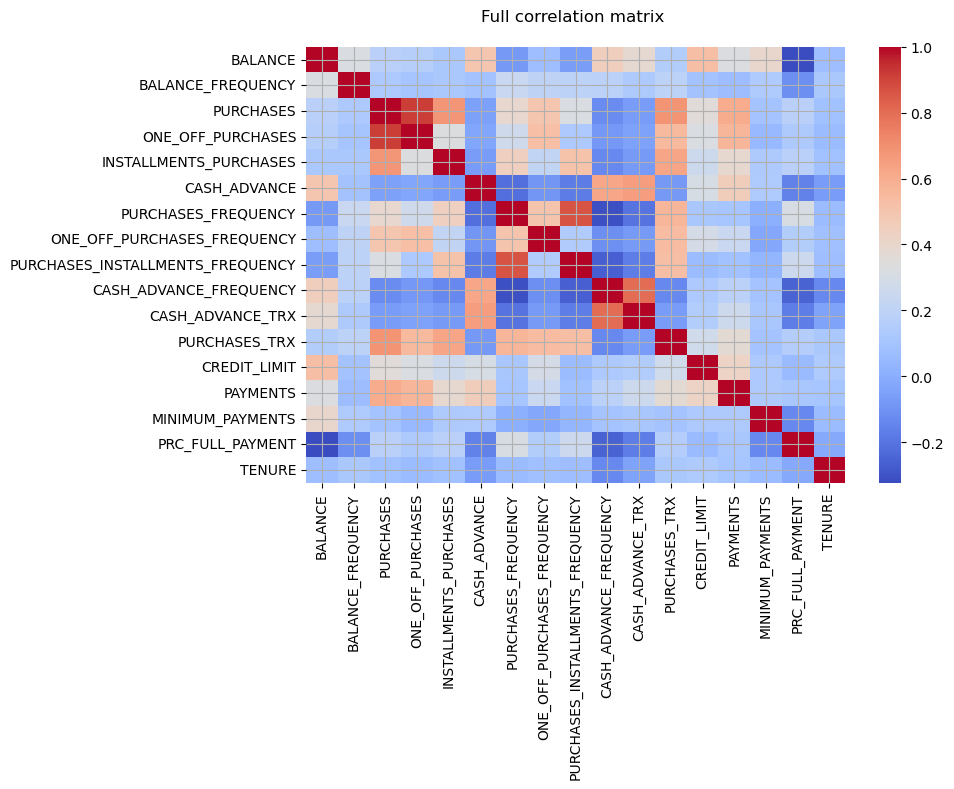

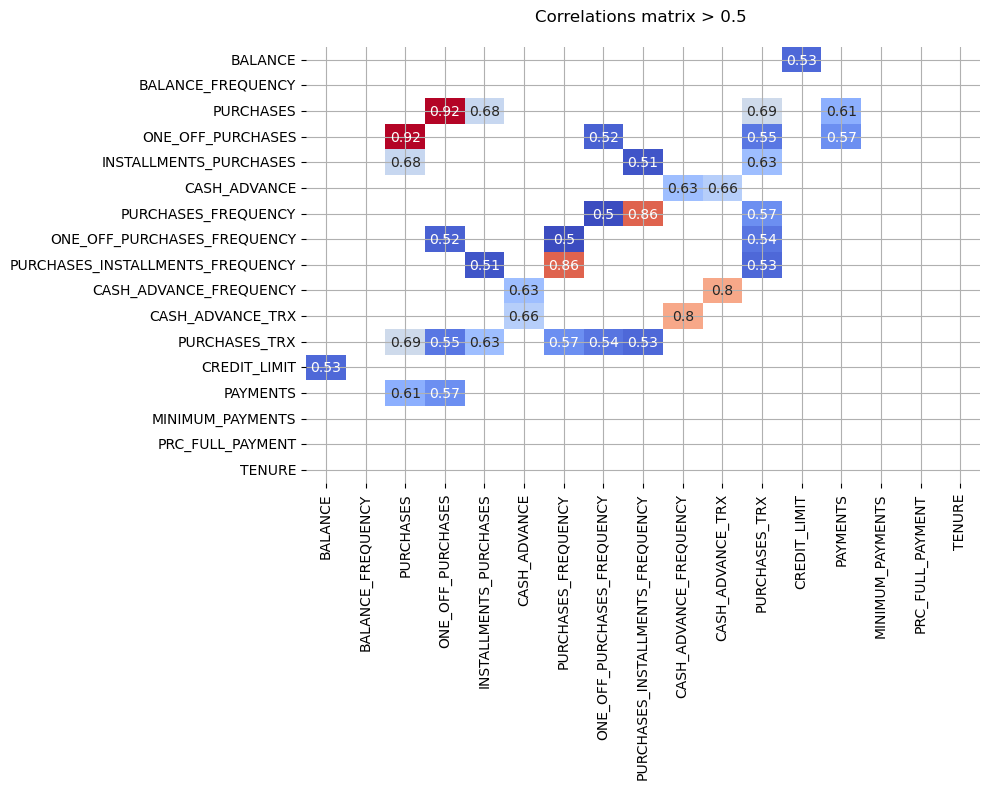

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

df_corr = df_clean.select_dtypes([float,int]).corr()

print("\n Full correlation matrix ")
display(df_corr)

print("\n Correlations matrix > 0.5 ")
display(df_corr[df_corr.abs() > .5].replace(1.0 , np.nan))

plt.figure(figsize = [10,8])
sns.heatmap(df_corr, cmap="coolwarm")
plt.title('Full correlation matrix \n')
mng = plt.get_current_fig_manager()
mng.full_screen_toggle()
plt.tight_layout()
plt.grid(True)
plt.show()

plt.figure(figsize = [10,8])
sns.heatmap(df_corr[df_corr.abs() > .5].replace(1.0 , np.nan) , cmap="coolwarm", annot = True, cbar=False)
plt.title('Correlations matrix > 0.5 \n')
mng = plt.get_current_fig_manager()
mng.full_screen_toggle()
plt.tight_layout()
plt.grid(True)
plt.show()



### Observation
- We can see PURCHASE_TRX has the majority of highly correlations with other variables, and strong correlations ~ 0.9 between ONE_OFF_PURCHASES & PURCHASES

- However, this still doesn't show any non-linearity relationships/correlations within out dataset

## 1.4 Skewness of Numerical Features

In [10]:
df_clean.skew(numeric_only=True)

BALANCE                              2.385088
BALANCE_FREQUENCY                   -2.043418
PURCHASES                            8.117202
ONE_OFF_PURCHASES                   10.014259
INSTALLMENTS_PURCHASES               7.273088
CASH_ADVANCE                         5.148070
PURCHASES_FREQUENCY                  0.059709
ONE_OFF_PURCHASES_FREQUENCY          1.524458
PURCHASES_INSTALLMENTS_FREQUENCY     0.512125
CASH_ADVANCE_FREQUENCY               1.817475
CASH_ADVANCE_TRX                     5.702082
PURCHASES_TRX                        4.612853
CREDIT_LIMIT                         1.517362
PAYMENTS                             5.908170
MINIMUM_PAYMENTS                    13.764664
PRC_FULL_PAYMENT                     1.929568
TENURE                              -2.950187
dtype: float64

### Observation
- If we set our absolute skew limit to a modest/generous 2 (ideal range is 0.5->1), we can see the majority of the features are far-right skewed. 

## 1.5 Categorical features description
### Next, we are going to look at the categorical variable found within the plots above 'TENURE'

In [11]:
cat_col = 'TENURE'
print(f"\n Inspecting value count for = {cat_col}")
display(df[cat_col].describe())
display(df[cat_col].value_counts())


 Inspecting value count for = TENURE


count    8950.000000
mean       11.517318
std         1.338331
min         6.000000
25%        12.000000
50%        12.000000
75%        12.000000
max        12.000000
Name: TENURE, dtype: float64

TENURE
12    7584
11     365
10     236
6      204
8      196
7      190
9      175
Name: count, dtype: int64

### Observation
- We can see the category feature, in the form of integers, they are fully populated.
- Features 'TENURE' has 7 distinct values
- 'TENURE' = 12 makes up ~ 85% of the records, the dominate tenure period.
- "Tenure of a credit card" : refers to the length of time you have held a particular credit card account, essentially how long you've been a cardholder with that specific issuer; it indicates the duration of your credit card relationship with the company. 



---
# 2. Data Preprocessing

## 2.1 Feature Selection
- Here, we are gong to select features that are most relevant for customer segments; 
- This will include features that have some aspects to behaviour/characterists such as purchase_frequency, cash_advancement_frequency and their relation to their balance limits.

- We will first inspect the features first by analysing their variance, i.e., they have a wide range of values, as this will help with a better cluster model.
- Then, make the decision on which features to include  

In [12]:
from scipy import stats

# empty list to fill with Dataframes contain the feature, its skewness, number of unique values, outliers beyond 3xstd
df_dist_list=[]

for col in df_clean.columns:
    # Skew Details
    skew_detail = ''
    if df_clean[col].skew() == 0:
        skew_detail = 'Skewness = 0: Data is perfectly symmetric.'

    elif df_clean[col].skew() > 0:
        skew_detail = 'Skewness > 0: Positive skew (right skew).'

    elif df_clean[col].skew() < 0:
        skew_detail ='Skewness < 0: Negative skew (left skew).'

    # Log Skew Details
    skew_log_detail = ''
    if np.log(df_clean[col].skew()) == 0:
        skew_log_detail = 'Skewness = 0: Data is perfectly symmetric.'

    elif np.log(df_clean[col].skew()) > 0:
        skew_log_detail = 'Skewness > 0: Positive skew (right skew).'

    elif np.log(df_clean[col].skew()) < 0:
        skew_log_detail ='Skewness < 0: Negative skew (left skew).'

    # Num of outliers beyond 3StandardDeviation limit
    outliers = df_clean[np.abs(stats.zscore(df_clean[col])) > 3]

    skew_no_outliers = df_clean[np.abs(stats.zscore(df_clean[col])) < 3][col].skew()

    df_dist_list.append(pd.DataFrame({
        'Feature' : [col],
        'n_unique_values' : [len(df_clean[col].unique())],
        'skewness' : [df_clean[col].skew()],
        'skew_detail' : [skew_detail],
        'skewness_log' : [np.log1p(df_clean[col].skew())],
        'skew_log_detail' : [skew_log_detail],
        'n_outliers_3std' : [len(outliers)],
        'skew_no_outliers': [skew_no_outliers]

    }))

df_feature_sel = pd.concat(df_dist_list).sort_values(by=['n_unique_values'] , ascending=False)

df_feature_sel

C:\Users\cpitt\AppData\Local\Temp\ipykernel_38892\1977406031.py:20: RuntimeWarning: invalid value encountered in log
  if np.log(df_clean[col].skew()) == 0:
C:\Users\cpitt\AppData\Local\Temp\ipykernel_38892\1977406031.py:23: RuntimeWarning: invalid value encountered in log
  elif np.log(df_clean[col].skew()) > 0:
C:\Users\cpitt\AppData\Local\Temp\ipykernel_38892\1977406031.py:26: RuntimeWarning: invalid value encountered in log
  elif np.log(df_clean[col].skew()) < 0:
C:\Users\cpitt\AppData\Local\Temp\ipykernel_38892\1977406031.py:39: RuntimeWarning: invalid value encountered in log1p
  'skewness_log' : [np.log1p(df_clean[col].skew())],
C:\Users\cpitt\AppData\Local\Temp\ipykernel_38892\1977406031.py:20: RuntimeWarning: invalid value encountered in log
  if np.log(df_clean[col].skew()) == 0:
C:\Users\cpitt\AppData\Local\Temp\ipykernel_38892\1977406031.py:23: RuntimeWarning: invalid value encountered in log
  elif np.log(df_clean[col].skew()) > 0:
C:\Users\cpitt\AppData\Local\Temp\ipyker

Feature  n_unique_values   skewness  \
0                           BALANCE             8836   2.385088   
0                          PAYMENTS             8637   5.908170   
0                  MINIMUM_PAYMENTS             8636  13.764664   
0                         PURCHASES             6159   8.117202   
0            INSTALLMENTS_PURCHASES             4421   7.273088   
0                      CASH_ADVANCE             4313   5.148070   
0                 ONE_OFF_PURCHASES             4003  10.014259   
0                      CREDIT_LIMIT              205   1.517362   
0                     PURCHASES_TRX              173   4.612853   
0                  CASH_ADVANCE_TRX               65   5.702082   
0            CASH_ADVANCE_FREQUENCY               54   1.817475   
0               PURCHASES_FREQUENCY               47   0.059709   
0       ONE_OFF_PURCHASES_FREQUENCY               47   1.524458   
0                  PRC_FULL_PAYMENT               47   1.929568   
0  PURCHASES_INSTALLMENTS_FREQUENCY               47   0.512125   
0                 BALANCE_FREQUENCY               43  -2.043418   
0                            TENURE                7  -2.950187   

                                 skew_detail  skewness_log  \
0  Skewness > 0: Positive skew (right skew).      1.219380   
0  Skewness > 0: Positive skew (right skew).      1.932705   
0  Skewness > 0: Positive skew (right skew).      2.692237   
0  Skewness > 0: Positive skew (right skew).      2.210163   
0  Skewness > 0: Positive skew (right skew).      2.113008   
0  Skewness > 0: Positive skew (right skew).      1.816138   
0  Skewness > 0: Positive skew (right skew).      2.399191   
0  Skewness > 0: Positive skew (right skew).      0.923211   
0  Skewness > 0: Positive skew (right skew).      1.725059   
0  Skewness > 0: Positive skew (right skew).      1.902418   
0  Skewness > 0: Positive skew (right skew).      1.035841   
0  Skewness > 0: Positive skew (right skew).      0.057994   
0  Skewness > 0: Positive skew (right skew).      0.926026   
0  Skewness > 0: Positive skew (right skew).      1.074855   
0  Skewness > 0: Positive skew (right skew).      0.413516   
0   Skewness < 0: Negative skew (left skew).           NaN   
0   Skewness < 0: Negative skew (left skew).           NaN   

                             skew_log_detail  n_outliers_3std  \
0  Skewness > 0: Positive skew (right skew).              194   
0  Skewness > 0: Positive skew (right skew).              158   
0  Skewness > 0: Positive skew (right skew).              102   
0  Skewness > 0: Positive skew (right skew).              135   
0  Skewness > 0: Positive skew (right skew).              136   
0  Skewness > 0: Positive skew (right skew).              179   
0  Skewness > 0: Positive skew (right skew).              122   
0  Skewness > 0: Positive skew (right skew).              152   
0  Skewness > 0: Positive skew (right skew).              185   
0  Skewness > 0: Positive skew (right skew).              172   
0  Skewness > 0: Positive skew (right skew).              199   
0   Skewness < 0: Negative skew (left skew).                0   
0  Skewness > 0: Positive skew (right skew).                0   
0  Skewness > 0: Positive skew (right skew).                0   
0   Skewness < 0: Negative skew (left skew).                0   
0                                                         275   
0                                                         389   

   skew_no_outliers  
0          1.637334  
0          2.293601  
0          3.295265  
0          2.358901  
0          2.294349  
0          2.192353  
0          2.704483  
0          1.089967  
0          2.063095  
0          2.184417  
0          1.484328  
0          0.059709  
0          1.524458  
0          1.929568  
0          0.512125  
0         -2.073481  
0         -3.487019

### Observation
- We see we have a few outliers per feature and the majority are positively right skewed.
- The ideal features are those that contain a wide variety of unique values, and small number of outliers.
- In our case, we are going to remove features that have less than 45 unique values and more than 200 outliers.

In [13]:
feat_sel = df_feature_sel.loc[(df_feature_sel['n_unique_values'] > 45)
                          &
                          (df_feature_sel['n_outliers_3std'] < 200)]['Feature']
print(f"\n Selected feature list ...")
display(list(feat_sel))

df_feat_sel = df_clean[list(feat_sel)]

df_feat_sel


 Selected feature list ...


['BALANCE',
 'PAYMENTS',
 'MINIMUM_PAYMENTS',
 'PURCHASES',
 'INSTALLMENTS_PURCHASES',
 'CASH_ADVANCE',
 'ONE_OFF_PURCHASES',
 'CREDIT_LIMIT',
 'PURCHASES_TRX',
 'CASH_ADVANCE_TRX',
 'CASH_ADVANCE_FREQUENCY',
 'PURCHASES_FREQUENCY',
 'ONE_OFF_PURCHASES_FREQUENCY',
 'PRC_FULL_PAYMENT',
 'PURCHASES_INSTALLMENTS_FREQUENCY']

BALANCE     PAYMENTS  MINIMUM_PAYMENTS  PURCHASES  \
0       40.900749   201.802084        139.509787      95.40   
1     3202.467416  4103.032597       1072.340217       0.00   
2     2495.148862   622.066742        627.284787     773.17   
3     1666.670542     0.000000          0.000000    1499.00   
4      817.714335   678.334763        244.791237      16.00   
...           ...          ...               ...        ...   
8944   193.571722     0.000000          0.000000    1012.73   
8945    28.493517   325.594462         48.886365     291.12   
8947    23.398673    81.270775         82.418369     144.40   
8948    13.457564    52.549959         55.755628       0.00   
8949   372.708075    63.165404         88.288956    1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  ONE_OFF_PURCHASES  CREDIT_LIMIT  \
0                      95.40      0.000000               0.00        1000.0   
1                       0.00   6442.945483               0.00        7000.0   
2                       0.00      0.000000             773.17        7500.0   
3                       0.00    205.788017            1499.00        7500.0   
4                       0.00      0.000000              16.00        1200.0   
...                      ...           ...                ...           ...   
8944                    0.00      0.000000            1012.73        4000.0   
8945                  291.12      0.000000               0.00        1000.0   
8947                  144.40      0.000000               0.00        1000.0   
8948                    0.00     36.558778               0.00         500.0   
8949                    0.00    127.040008            1093.25        1200.0   

      PURCHASES_TRX  CASH_ADVANCE_TRX  CASH_ADVANCE_FREQUENCY  \
0                 2                 0                0.000000   
1                 0                 4                0.250000   
2                12                 0                0.000000   
3                 1                 1                0.083333   
4                 1                 0                0.000000   
...             ...               ...                     ...   
8944              2                 0                0.000000   
8945              6                 0                0.000000   
8947              5                 0                0.000000   
8948              0                 2                0.166667   
8949             23                 2                0.333333   

      PURCHASES_FREQUENCY  ONE_OFF_PURCHASES_FREQUENCY  PRC_FULL_PAYMENT  \
0                0.166667                     0.000000          0.000000   
1                0.000000                     0.000000          0.222222   
2                1.000000                     1.000000          0.000000   
3                0.083333                     0.083333          0.000000   
4                0.083333                     0.083333          0.000000   
...                   ...                          ...               ...   
8944             0.333333                     0.333333          0.000000   
8945             1.000000                     0.000000          0.500000   
8947             0.833333                     0.000000          0.250000   
8948             0.000000                     0.000000          0.250000   
8949             0.666667                     0.666667          0.000000   

      PURCHASES_INSTALLMENTS_FREQUENCY  
0                             0.083333  
1                             0.000000  
2                             0.000000  
3                             0.000000  
4                             0.000000  
...                                ...  
8944                          0.000000  
8945                          0.833333  
8947                          0.666667  
8948                          0.000000  
8949                          0.000000  

[8876 rows x 15 columns]

## 2.2 Feature Engineering
- Here, we are going to StandardScaler our data, since the features within the dataset have different scales, 
- Also, StandardScaler is ideal as it is less prone to outliers.


In [14]:
from sklearn.preprocessing import StandardScaler

# definie standarizing numerical features method
scaler = StandardScaler()

df_clean_std = scaler.fit_transform(df_feat_sel)

df_clean_std = pd.DataFrame(df_clean_std , columns=df_feat_sel.columns)

df_clean_std



BALANCE  PAYMENTS  MINIMUM_PAYMENTS  PURCHASES  INSTALLMENTS_PURCHASES  \
0    -0.736905 -0.531938         -0.299201  -0.426040               -0.349910   
1     0.779306  0.820499          0.098709  -0.470533               -0.455019   
2     0.440093 -0.386245         -0.091135  -0.109937               -0.455019   
3     0.042775 -0.601897         -0.358710   0.228579               -0.455019   
4    -0.364364 -0.366739         -0.254292  -0.463071               -0.455019   
...        ...       ...               ...        ...                     ...   
8871 -0.663687 -0.601897         -0.358710   0.001790               -0.455019   
8872 -0.742855 -0.489023         -0.337857  -0.334759               -0.134270   
8873 -0.745298 -0.573723         -0.323554  -0.403187               -0.295923   
8874 -0.750066 -0.583679         -0.334927  -0.470533               -0.455019   
8875 -0.577778 -0.579999         -0.321049   0.039343               -0.455019   

      CASH_ADVANCE  ONE_OFF_PURCHASES  CREDIT_LIMIT  PURCHASES_TRX  \
0        -0.468992          -0.357926     -0.961640      -0.512413   
1         2.593303          -0.357926      0.684124      -0.592596   
2        -0.468992           0.106237      0.821271      -0.111498   
3        -0.371182           0.541981      0.821271      -0.552505   
4        -0.468992          -0.348321     -0.906781      -0.552505   
...            ...                ...           ...            ...   
8871     -0.468992           0.250055     -0.138758      -0.512413   
8872     -0.468992          -0.357926     -0.961640      -0.352047   
8873     -0.468992          -0.357926     -0.961640      -0.392139   
8874     -0.451616          -0.357926     -1.098787      -0.592596   
8875     -0.408611           0.298394     -0.906781       0.329508   

      CASH_ADVANCE_TRX  CASH_ADVANCE_FREQUENCY  PURCHASES_FREQUENCY  \
0            -0.478306               -0.678664            -0.806206   
1             0.105923                0.567547            -1.221417   
2            -0.478306               -0.678664             1.269844   
3            -0.332249               -0.263262            -1.013812   
4            -0.478306               -0.678664            -1.013812   
...                ...                     ...                  ...   
8871         -0.478306               -0.678664            -0.390997   
8872         -0.478306               -0.678664             1.269844   
8873         -0.478306               -0.678664             0.854633   
8874         -0.186192                0.152145            -1.221417   
8875         -0.186192                0.982948             0.439425   

      ONE_OFF_PURCHASES_FREQUENCY  PRC_FULL_PAYMENT  \
0                       -0.681576         -0.528346   
1                       -0.681576          0.229157   
2                        2.662996         -0.528346   
3                       -0.402863         -0.528346   
4                       -0.402863         -0.528346   
...                           ...               ...   
8871                     0.433280         -0.528346   
8872                    -0.681576          1.176038   
8873                    -0.681576          0.323846   
8874                    -0.681576          0.323846   
8875                     1.548140         -0.528346   

      PURCHASES_INSTALLMENTS_FREQUENCY  
0                            -0.705852  
1                            -0.915619  
2                            -0.915619  
3                            -0.915619  
4                            -0.915619  
...                                ...  
8871                         -0.915619  
8872                          1.182052  
8873                          0.762519  
8874                         -0.915619  
8875                         -0.915619  

[8876 rows x 15 columns]

---
# 3. Clustering

## 3.1 KMeans Clustering
- Going to use the Elbow methd and silhouette score to find ideal number of clusters

---
### **Background:**
- **Silhouette Score :** A silhouette score is a metric that evaluates how well data points are grouped into clusters. It's used in computer science to assess the quality of clustering. 

- How it works?
    - The silhouette score ranges from -1 to 1. 
    - A high score indicates that a data point is close to its cluster and far from other clusters. 
    - A low score indicates that a data point is far from its cluster and close to other clusters. 
    - A score of 0 indicates that a data point is on the border of two clusters. 

- Why it's useful?
    - The silhouette score helps determine if the correct number of clusters has been chosen and if the data points are grouped meaningfully. 

- Example :
    - For example, a business could use the silhouette score to segment customers based on purchasing behavior. This could help the business create personalized marketing strategies. 

- Related methods
    - The silhouette score is often combined with clustering methods like K-Means, hierarchical, DBSCAN clustering  

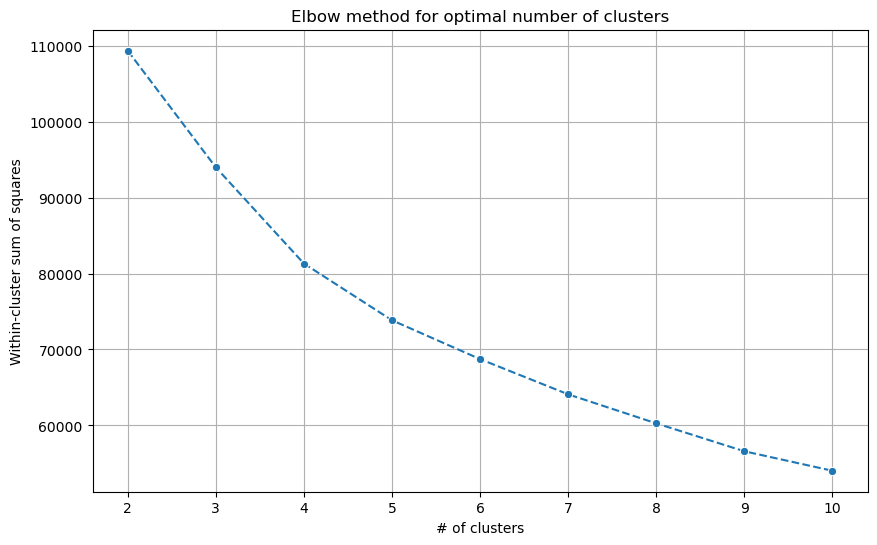

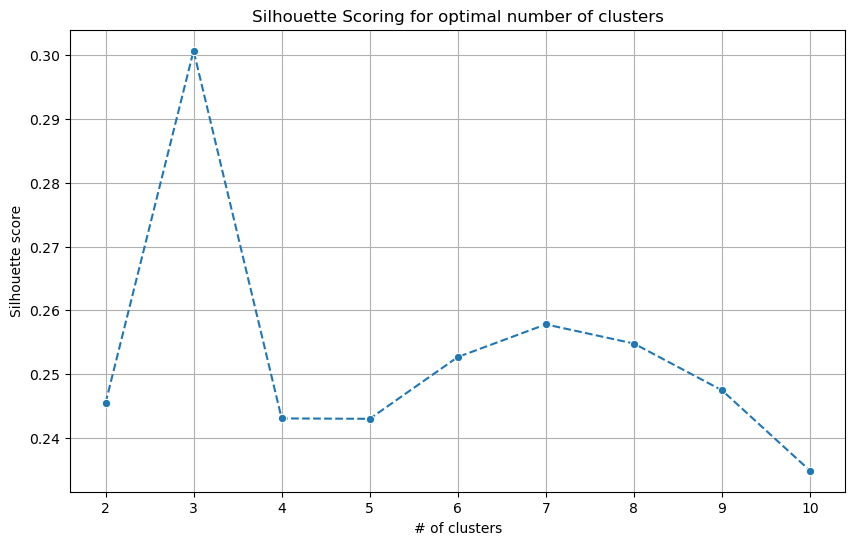

In [15]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score


# Let's use the Elbow graph to determine optimal number of clusters:
wcss = []
sil_scores = []
max_clusters = 10

params = {
    "init": "k-means++" ,
    "n_init": 50, 
    "max_iter": 500, 
    "random_state": 42
    }

# Range from 2+ clusters to 10
for i in range(2, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, **params)
    kmeans.fit(df_clean_std)
    wcss.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(df_clean_std , kmeans.labels_))

# Elbow Graph
plt.figure(figsize=(10, 6))
sns.lineplot(x=range(2, max_clusters + 1), y=wcss, marker='o', linestyle='--')
plt.xlabel('# of clusters')
plt.ylabel('Within-cluster sum of squares')
plt.title('Elbow method for optimal number of clusters')
plt.grid(True)
plt.show()

# # silhouette Scores
plt.figure(figsize=(10, 6))
sns.lineplot(x=range(2, max_clusters + 1), y=sil_scores, marker='o', linestyle='--')
plt.xlabel('# of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette Scoring for optimal number of clusters')
plt.grid(True)
plt.show()



### Oservation
- We can see from our Elbow curve, it is quite difficult to determine the number of cluster in this case.
- By looking at the Silhouette score for support, we see clusters = 3 seems to be ideal,
- We are now going to explore 3 groups clusters ad determne their characteristics

## 3.2 Explore Group Behaviours/Characteristics

cluster_groups
0    6167
1    1552
2    1157
Name: count, dtype: int64

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONE_OFF_PURCHASES  \
0       40.900749           0.818182      95.40               0.00   
1     3202.467416           0.909091       0.00               0.00   
2     2495.148862           1.000000     773.17             773.17   
3     1666.670542           0.636364    1499.00            1499.00   
4      817.714335           1.000000      16.00              16.00   
...           ...                ...        ...                ...   
8871   461.455720           1.000000     585.00             585.00   
8872   600.052391           1.000000     274.00               0.00   
8873  1023.883008           1.000000     585.84               0.00   
8874   686.623746           1.000000     422.21             149.00   
8875    16.023788           1.000000     207.28               0.00   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8871                    0.00      0.000000             0.125000   
8872                  274.00    821.878829             1.000000   
8873                  585.84    956.849209             1.000000   
8874                  273.21    729.332469             1.000000   
8875                  207.28      0.000000             1.000000   

      ONE_OFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                        0.000000                          0.083333   
1                        0.000000                          0.000000   
2                        1.000000                          0.000000   
3                        0.083333                          0.000000   
4                        0.083333                          0.000000   
...                           ...                               ...   
8871                     0.125000                          0.000000   
8872                     0.000000                          0.875000   
8873                     0.000000                          0.875000   
8874                     0.333333                          0.833333   
8875                     0.000000                          0.875000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8871                0.000000                 0              1        1000.0   
8872                0.500000                13              8        1000.0   
8873                0.125000                 2             22        1000.0   
8874                0.166667                 2             11        1000.0   
8875                0.000000                 0              8        1000.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  cluster_groups  
0      201.802084        139.509787          0.000000      12               0  
1     4103.032597       1072.340217          0.222222      12               1  
2      622.066742        627.284787          0.000000      12               0  
3        0.000000          0.000000          0.000000      12               0  
4      678.334763        244.791237          0.000000      12               0  
...           ...               ...               ...     ...             ...  
88

<Figure size 1500x1000 with 0 Axes>

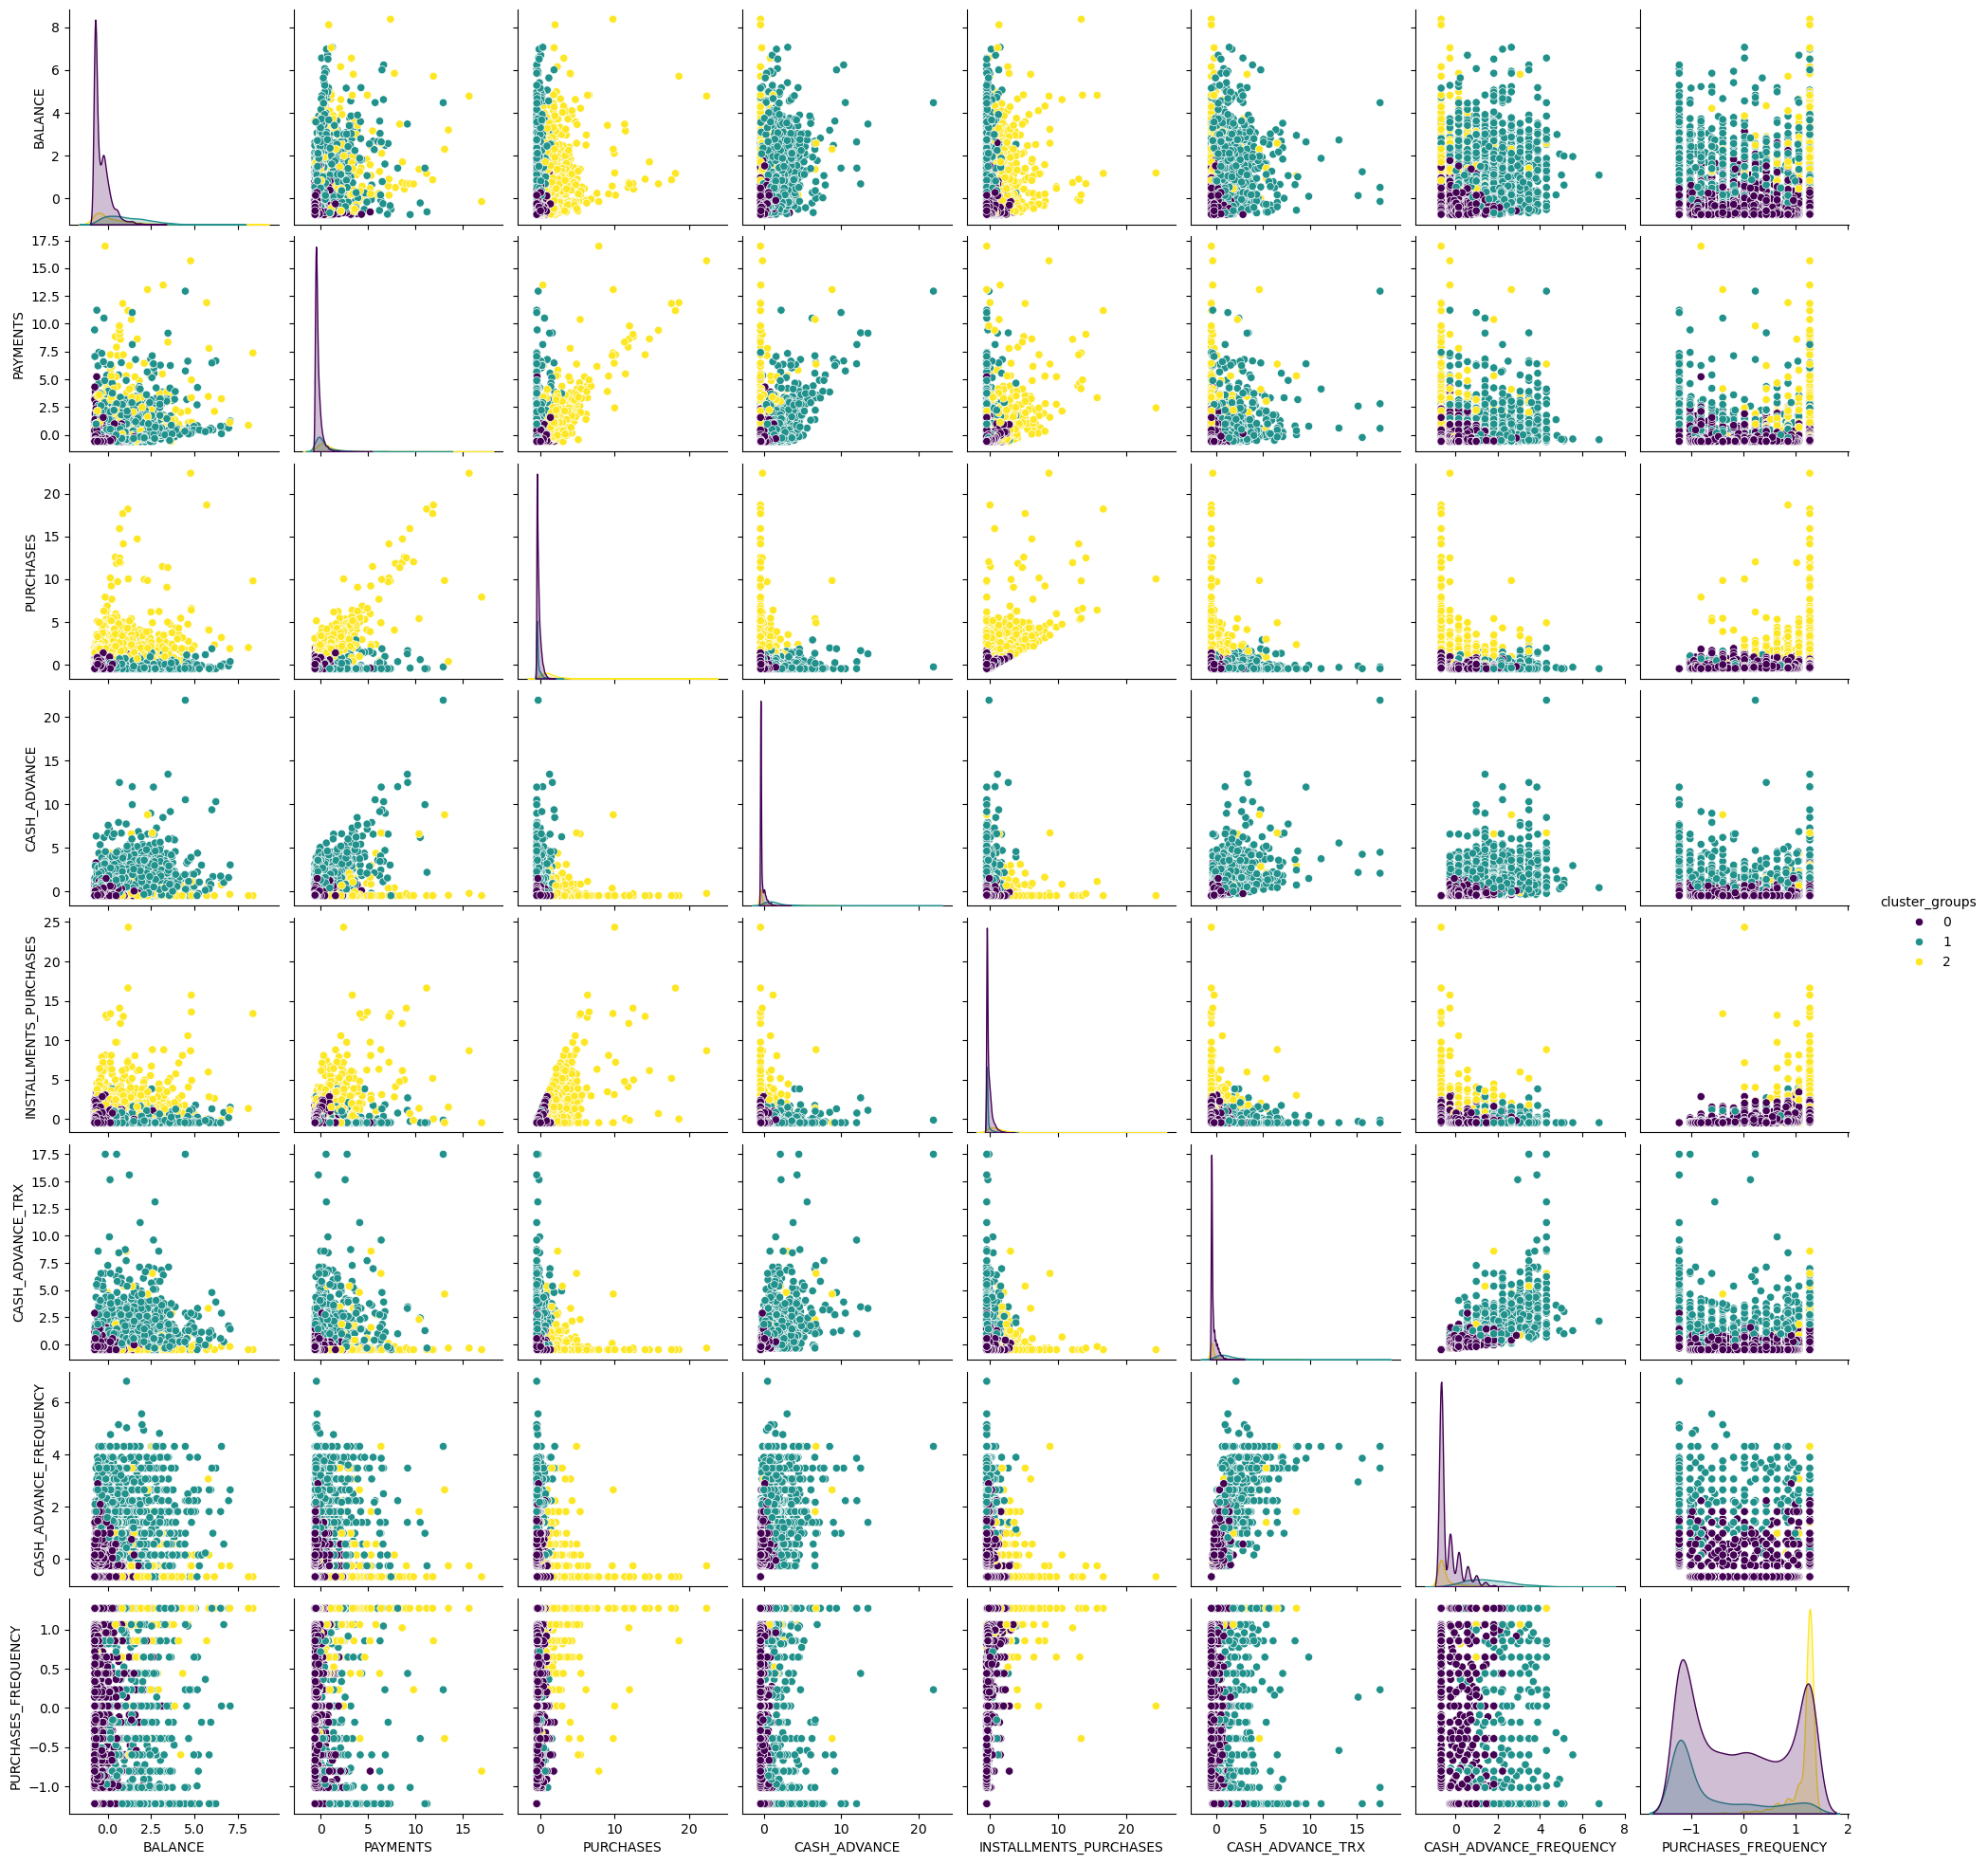

In [ ]:
num_clusters = 3

# Applying K-Means
kmeans = KMeans(n_clusters=num_clusters, **params)

# Assigning Cluster groups
df_clean_std['cluster_groups'] = kmeans.fit_predict(df_clean_std)

display(df_clean_std['cluster_groups'].value_counts())

feat_to_explore = ['BALANCE','PAYMENTS','PURCHASES','CASH_ADVANCE','INSTALLMENTS_PURCHASES','CASH_ADVANCE_TRX','CASH_ADVANCE_FREQUENCY','PURCHASES_FREQUENCY','cluster_groups']

# INNER JOIN Dataframes to get additional Feautures, to group via cluster_groups
display(df_clean.merge(df_clean_std['cluster_groups'], how='inner', left_index=True, right_index=True))

# Visualize the clusters pair plots
plt.figure(figsize=(15, 10))
sns.pairplot(df_clean_std[feat_to_explore], hue='cluster_groups', palette = "viridis")

plt.grid(True)
mng = plt.get_current_fig_manager()
mng.full_screen_toggle()
plt.grid(True)
plt.show()


|   **Features**      |    **Description**     |
|---------------------|------------------------|
|**Balance**  |	A credit card balance or Total amount left in their account to make purchases      
| **Payments**	| Total amount of payments done by user |
| **Purchases**	| Total amount of purchases made from account |
| **Purchases_Frequency**	| How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased) |
| **Cash_Advance**	| Cash in advance given by the user |
| **Installments_Purchases**	| Amount of purchase done in installment |
| **Cash_Advance_Frequency**	| How frequently the cash in advance being paid|
| **Cash_Advance_Trx** |	Number of Transactions made with "Cash in Advanced"|

### Observation
- We have 3 customer groups, with Group 0 being the largest followed by Group 1 then Group 2.

#### **Group 0 (Purple) :** 
- Tend to have a low and high **balance** within their card, and make no **installment_purchases** with their card. They tend to make very low amount of **purchases** with their card, but make some **Payments** in correlation to **Cash_Advance**. This indicates Group 0 tend to make large number of cash withdraws, as shown in **Cash_Advance_Trx** & **Cash_Advance_Frequency**. 
- This entails Group 0 only use their card mainly to withdraw cash only and make no purchases with the card as shown with the low **Purchases_Frequency**, hence utilising the card for short term cash loans. 
- **(*active short-term-cash-loans-borrowers*)**

#### **Group 1 (Turquoise):** 
- Tend to have a low **balance** within their card, and only a small number participate in **installment_purchases** with their card. They tend to make very low amount of **purchases** with their card but have a high **Purchases_Frequency**, but make small amounts of **Payments**. They do not use their card for any cash withdrawals, as shown via **Cash_Advance_Trx** & **Cash_Advance_Frequency**. 
- This entails Group 1 use the card to make multiple small amount purchases quite frequently, hence utilising the card for small everyday purchases. 
- **(*active everyday-small-spending*)**

#### **Group 2 (Yellow):** 
- Tend to have a broad distribution of **balance** and large number who participate in **installment_purchases** with their card. They tend to make high amount of **purchases** with their card and have a high **Purchases_Frequency**, with high amounts of **Payments**. They also use their card for cash withdrawals, as shown via **Cash_Advance_Trx** & **Cash_Advance_Frequency**, but not as active as Group 0 on this case. 
- This entails Group 2 use the card to make multiple large amount of purchases and quite frequently, hence they are the active for large purchases. 
- **(*active frequent-large-spenders*)**


### **Conclude:**
- A credit card compnay can us this customer segmentation to tailor products and marketing strategy. Group 0 are not your spenders, but they will withdraw cash for short-term loan purposes. Group 1 have a low balance, do not make big purchases, nor do they participate in installment purchases, but will use the card for everyday small purchases, Group 2 are the big spenders, who make regular high purchases.
- These characteristics are ideal for a credit card company to innovate new ideas, such as incentives for each group, related to their common activity, i.e., low Fee cash withdrawals when used x amount of times, rewards for daily low-purchase use or card, and big rewards for big purchases..etc; using incentives to get these groups to spend or utilise their card more.  


## 3.3 Perform Principal Component Analysis (PCA)
---
### **Background Information**

- Principal Component Analysis (PCA) is a technique for dimensionality reduction and feature extraction that can be used to simplify complex datasets, identify patterns, and improve model performance.

- PCA is often used to:
    - reduce dimensionality in the data - in particular the **curse of dimensionality** refers to challenges that highly-dimensional data leads to, such as overfitting, increased computational cost, and difficulty in visualisation/interpretability. Principal Component Analysis (PCA) is a technique that helps mitigate these problems by reducing the number of dimensions while retaining most of the variability in the data.

    - for segmentation purposes: PCA can be helpful to visualise segments, having reduced multi dimensional data into lower dimensional space (e.g. 2 PCs).

- How does it work?

    - PCA is a linear transformation technique that projects data into a new coordinate system. The new coordinates, called **principal components**, are ordered by the amount of variance they capture from the data. We say that the new features that are **linear combinations** of the original features.

    **Steps followed:**
    1. **Standardize the Data:** Center the data around the mean and scale it to unit variance.
    2. **Compute the Covariance Matrix:** Measure the covariance between features.
    3. **Calculate Eigenvalues and Eigenvectors:** Determine the principal components.
    4. **Sort and Select Principal Components:** Choose components that capture the most variance.
    5. **Transform the Data:** Project data onto the selected principal components.
    ---

### **NOTE:**
- Here, we are going to perform PCA to scale/reduce our datasets dimensionality, i.e., from a large set of features to less `component` features



In [17]:
from sklearn.decomposition import PCA

# Starting off with just three components

# Initialize PCA with the number of components you want to keep
pca = PCA(n_components=3)  # Reduce to 2 dimensions, often used for visualization
df_pca = pd.DataFrame(pca.fit_transform(df_clean_std)
                      , columns = ["pc1", "pc2","pc3" ])

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
print("Explained variance ratio by component:", explained_variance)

# Cumulative explained variance
cumulative_variance = np.cumsum(explained_variance)
print("Cumulative explained variance:", cumulative_variance)

display(df_pca)

Explained variance ratio by component: [0.30745561 0.2244986  0.08919153]
Cumulative explained variance: [0.30745561 0.53195422 0.62114574]


pc1       pc2       pc3
0    -1.804034 -0.990181 -0.665655
1    -0.922393  2.638112 -0.370624
2     0.744675 -0.572953 -0.892978
3    -0.881134  0.113675 -1.438228
4    -1.798847 -0.701786 -0.922804
...        ...       ...       ...
8871 -0.887366 -0.850857 -1.298174
8872 -0.288717 -2.162814  1.209360
8873 -0.751446 -1.835897  0.820729
8874 -2.072259 -0.577917 -0.788783
8875 -0.223341 -0.364769 -0.784973

[8876 rows x 3 columns]

**Explained Variance Ratio** indicates the proportion of the dataset's total variance that is captured by each principal component.  
**Cumulative Explained Variance** is the sum of the explained variance ratios up to a given principal component, i.e. total proportion of the variance explained by the first *'X'* principal components.

### Observation 
**Caveat:** 62% not good enough to use these principal components alone, we would need to add a few more to get to 80%+ (rule of thumb) to use PCs instead of original data.

- Now, We are going to inspect the optimal number of components to get to the 80%+ mark.

No. of PCS Components =2 , CumulativeSum_Explained_Variance =0.531954216347458
No. of PCS Components =3 , CumulativeSum_Explained_Variance =0.6211457447753519
No. of PCS Components =4 , CumulativeSum_Explained_Variance =0.6981122551620658
No. of PCS Components =5 , CumulativeSum_Explained_Variance =0.7586092737872593
No. of PCS Components =6 , CumulativeSum_Explained_Variance =0.8142448908401582
No. of PCS Components =7 , CumulativeSum_Explained_Variance =0.8610215723809105
No. of PCS Components =8 , CumulativeSum_Explained_Variance =0.8960691462529584
No. of PCS Components =9 , CumulativeSum_Explained_Variance =0.9228018377546766
No. of PCS Components =10 , CumulativeSum_Explained_Variance =0.9427198340507803
No. of PCS Components =11 , CumulativeSum_Explained_Variance =0.9597423862324245
No. of PCS Components =12 , CumulativeSum_Explained_Variance =0.9736755066596191
No. of PCS Components =13 , CumulativeSum_Explained_Variance =0.9868122685719373
No. of PCS Components =14 , Cumulativ

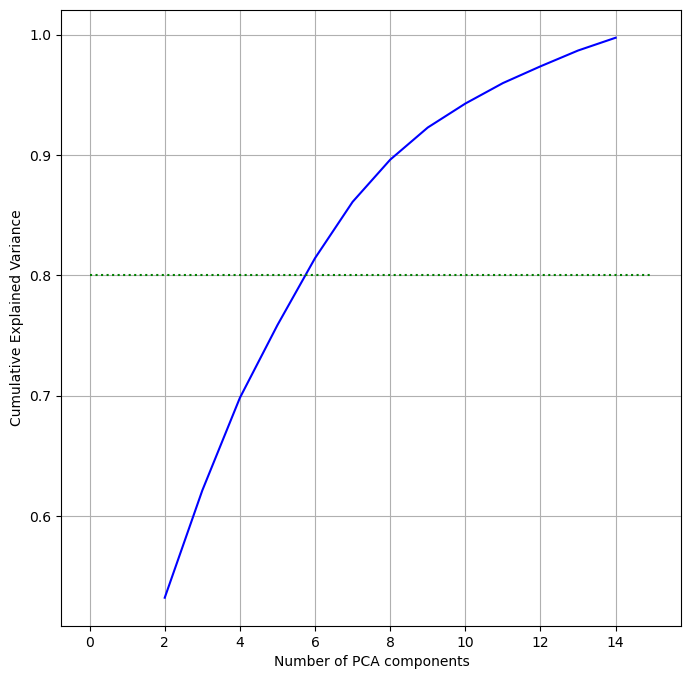

In [18]:
no_comp = []
cum_exp_var = []

for i in range(2,15,1):
    pca = PCA(n_components=i)
    df_pca_comp = pd.DataFrame(pca.fit_transform(df_clean_std))

    no_comp.append((i))
    cum_exp_var.append((np.sum (pca.explained_variance_ratio_)))

    print(f"No. of PCS Components ={i} , CumulativeSum_Explained_Variance ={np.sum(pca.explained_variance_ratio_)}")


fig = plt.figure (figsize = (8 , 8))

plt.plot ( no_comp, cum_exp_var , color = "blue")
#plt.vlines (x = 8 , ymax = 1 , ymin = 0 , colors = "red", linestyles = '--')
plt.hlines (y = 0.8 , xmax = 15 , xmin = 0 , colors = "green" , linestyles = ":")

plt.xlabel ('Number of PCA components' , fontsize = 10)
plt.ylabel ('Cumulative Explained Variance' , fontsize = 10)

plt.grid (True)


### Observation:
At 6 components, we obtain our 80%+, so we will create our df_pca with 6 principle components.

In [19]:
# Initialize PCA with the number of components you want to keep

num_of_comp = 6

pca_cols = [f"pc{i}" for i in range(1 , num_of_comp + 1, 1)]

pca = PCA(n_components=6)  # Reduce to 2 dimensions, often used for visualization
df_pca = pd.DataFrame(pca.fit_transform(df_clean_std)
                      , columns = pca_cols)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
print("Explained variance ratio by component:", explained_variance)

# Cumulative explained variance
cumulative_variance = np.cumsum(explained_variance)
print("Cumulative explained variance:", cumulative_variance)

display(df_pca)

Explained variance ratio by component: [0.30745561 0.2244986  0.08919153 0.07696651 0.06049702 0.05563562]
Cumulative explained variance: [0.30745561 0.53195422 0.62114574 0.69811226 0.75860927 0.81424489]


pc1       pc2       pc3       pc4       pc5       pc6
0    -1.804034 -0.990181 -0.665655  0.393696 -0.357405 -0.589924
1    -0.922393  2.638112 -0.370624 -0.430699 -0.838052  1.183856
2     0.744675 -0.572953 -0.892978  0.575776  2.540672  0.856228
3    -0.881134  0.113675 -1.438228  0.697204  0.064552  0.309735
4    -1.798847 -0.701786 -0.922804  0.539288 -0.205961 -0.430316
...        ...       ...       ...       ...       ...       ...
8871 -0.887366 -0.850857 -1.298174  0.366640  0.538042 -0.160790
8872 -0.288717 -2.162814  1.209360 -0.824801 -0.519818  0.197173
8873 -0.751446 -1.835897  0.820729 -0.333670 -0.240370 -0.189176
8874 -2.072259 -0.577917 -0.788783 -0.293091 -0.587239 -0.468564
8875 -0.223341 -0.364769 -0.784973 -0.351189  1.621576 -1.173324

[8876 rows x 6 columns]

### Now we will inspect the number of potentail outliers that may occur within our PCA beyond the 3xStandardDeviation Threshold 

In [20]:
from scipy import stats

for col in pca_cols:
    
    print(f"### Column: {col} ###")
    # Calculate the Z-score for a specific column (e.g., annual_inc)
    df_pca[f"{col}_zscore"] = np.abs(stats.zscore(df_pca[f"{col}"]))

    # Flag outliers (Z-score > 3)
    outliers = df_pca[df_pca[f"{col}_zscore"] > 3]
    print(f"Outliers detected using z-scores: {len(outliers)}")

### Column: pc1 ###
Outliers detected using z-scores: 141
### Column: pc2 ###
Outliers detected using z-scores: 137
### Column: pc3 ###
Outliers detected using z-scores: 72
### Column: pc4 ###
Outliers detected using z-scores: 116
### Column: pc5 ###
Outliers detected using z-scores: 70
### Column: pc6 ###
Outliers detected using z-scores: 111


### Observation
- We see the number of outliers are small relative to the sample size of the dataset.

## 3.4 Cluster algorithms with PCA

### Going to peform KMeans clustering on the PCA fields
- As before, we will perform the Elbow method, to identify our ideal number of clusters, for our PCA dataset.


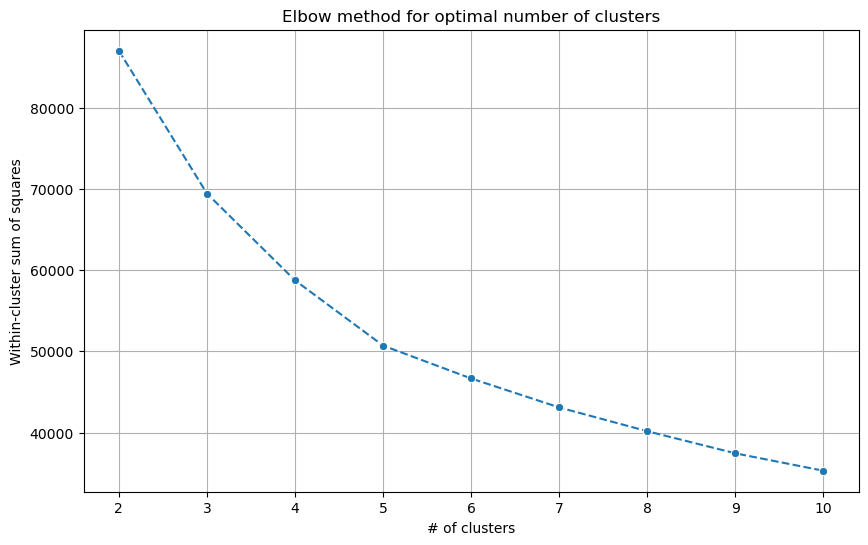

In [25]:
# Let's use the Elbow graph to determine optimal number of clusters:
wcss_pca = []
max_clusters = 10

params = {
    "init": "k-means++" ,
    "n_init": 50, 
    "max_iter": 500, 
    "random_state": 42
    }

# Range from 2+ clusters to 10
for i in range(2, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, **params)
    df_pca_comp = df_pca[pca_cols]
    kmeans.fit(df_pca_comp)
    wcss_pca.append(kmeans.inertia_)

# Elbow Graph
plt.figure(figsize=(10, 6))
sns.lineplot(x=range(2, max_clusters + 1), y=wcss_pca, marker='o', linestyle='--')
plt.xlabel('# of clusters')
plt.ylabel('Within-cluster sum of squares')
plt.title('Elbow method for optimal number of clusters')
plt.grid(True)
plt.show()


### Observation
- The PCA scaled version of our dataset, we see in the Elbow Method, 4 clusters seems to be the ideal number.
- Aslo, having too many segments/clusters can leads to more challenging interpretability later for Business Insights and Recommendations

cluster_groups
2    3820
1    3180
0    1216
3     660
Name: count, dtype: int64

BALANCE  PAYMENTS  MINIMUM_PAYMENTS  PURCHASES  INSTALLMENTS_PURCHASES  \
0    -0.736905 -0.531938         -0.299201  -0.426040               -0.349910   
1     0.779306  0.820499          0.098709  -0.470533               -0.455019   
2     0.440093 -0.386245         -0.091135  -0.109937               -0.455019   
3     0.042775 -0.601897         -0.358710   0.228579               -0.455019   
4    -0.364364 -0.366739         -0.254292  -0.463071               -0.455019   
...        ...       ...               ...        ...                     ...   
8871 -0.663687 -0.601897         -0.358710   0.001790               -0.455019   
8872 -0.742855 -0.489023         -0.337857  -0.334759               -0.134270   
8873 -0.745298 -0.573723         -0.323554  -0.403187               -0.295923   
8874 -0.750066 -0.583679         -0.334927  -0.470533               -0.455019   
8875 -0.577778 -0.579999         -0.321049   0.039343               -0.455019   

      CASH_ADVANCE  ONE_OFF_PURCHASES  CREDIT_LIMIT  PURCHASES_TRX  \
0        -0.468992          -0.357926     -0.961640      -0.512413   
1         2.593303          -0.357926      0.684124      -0.592596   
2        -0.468992           0.106237      0.821271      -0.111498   
3        -0.371182           0.541981      0.821271      -0.552505   
4        -0.468992          -0.348321     -0.906781      -0.552505   
...            ...                ...           ...            ...   
8871     -0.468992           0.250055     -0.138758      -0.512413   
8872     -0.468992          -0.357926     -0.961640      -0.352047   
8873     -0.468992          -0.357926     -0.961640      -0.392139   
8874     -0.451616          -0.357926     -1.098787      -0.592596   
8875     -0.408611           0.298394     -0.906781       0.329508   

      CASH_ADVANCE_TRX  CASH_ADVANCE_FREQUENCY  PURCHASES_FREQUENCY  \
0            -0.478306               -0.678664            -0.806206   
1             0.105923                0.567547            -1.221417   
2            -0.478306               -0.678664             1.269844   
3            -0.332249               -0.263262            -1.013812   
4            -0.478306               -0.678664            -1.013812   
...                ...                     ...                  ...   
8871         -0.478306               -0.678664            -0.390997   
8872         -0.478306               -0.678664             1.269844   
8873         -0.478306               -0.678664             0.854633   
8874         -0.186192                0.152145            -1.221417   
8875         -0.186192                0.982948             0.439425   

      ONE_OFF_PURCHASES_FREQUENCY  PRC_FULL_PAYMENT  \
0                       -0.681576         -0.528346   
1                       -0.681576          0.229157   
2                        2.662996         -0.528346   
3                       -0.402863         -0.528346   
4                       -0.402863         -0.528346   
...                           ...               ...   
8871                     0.433280         -0.528346   
8872                    -0.681576          1.176038   
8873                    -0.681576          0.323846   
8874                    -0.681576          0.323846   
8875                     1.548140         -0.528346   

      PURCHASES_INSTALLMENTS_FREQUENCY  cluster_groups_x  cluster_groups_y  
0                            -0.705852                 0                 2  
1                            -0.915619                 1                 0  
2                            -0.915619                 0                 1  
3                            -0.915619                 0                 2  
4                            -0.915619                 0                 2  
...                                ...               ...               ...  
8871                         -0.915619                 0                 2  
8872                          1.182052                 0       

<Figure size 1500x1000 with 0 Axes>

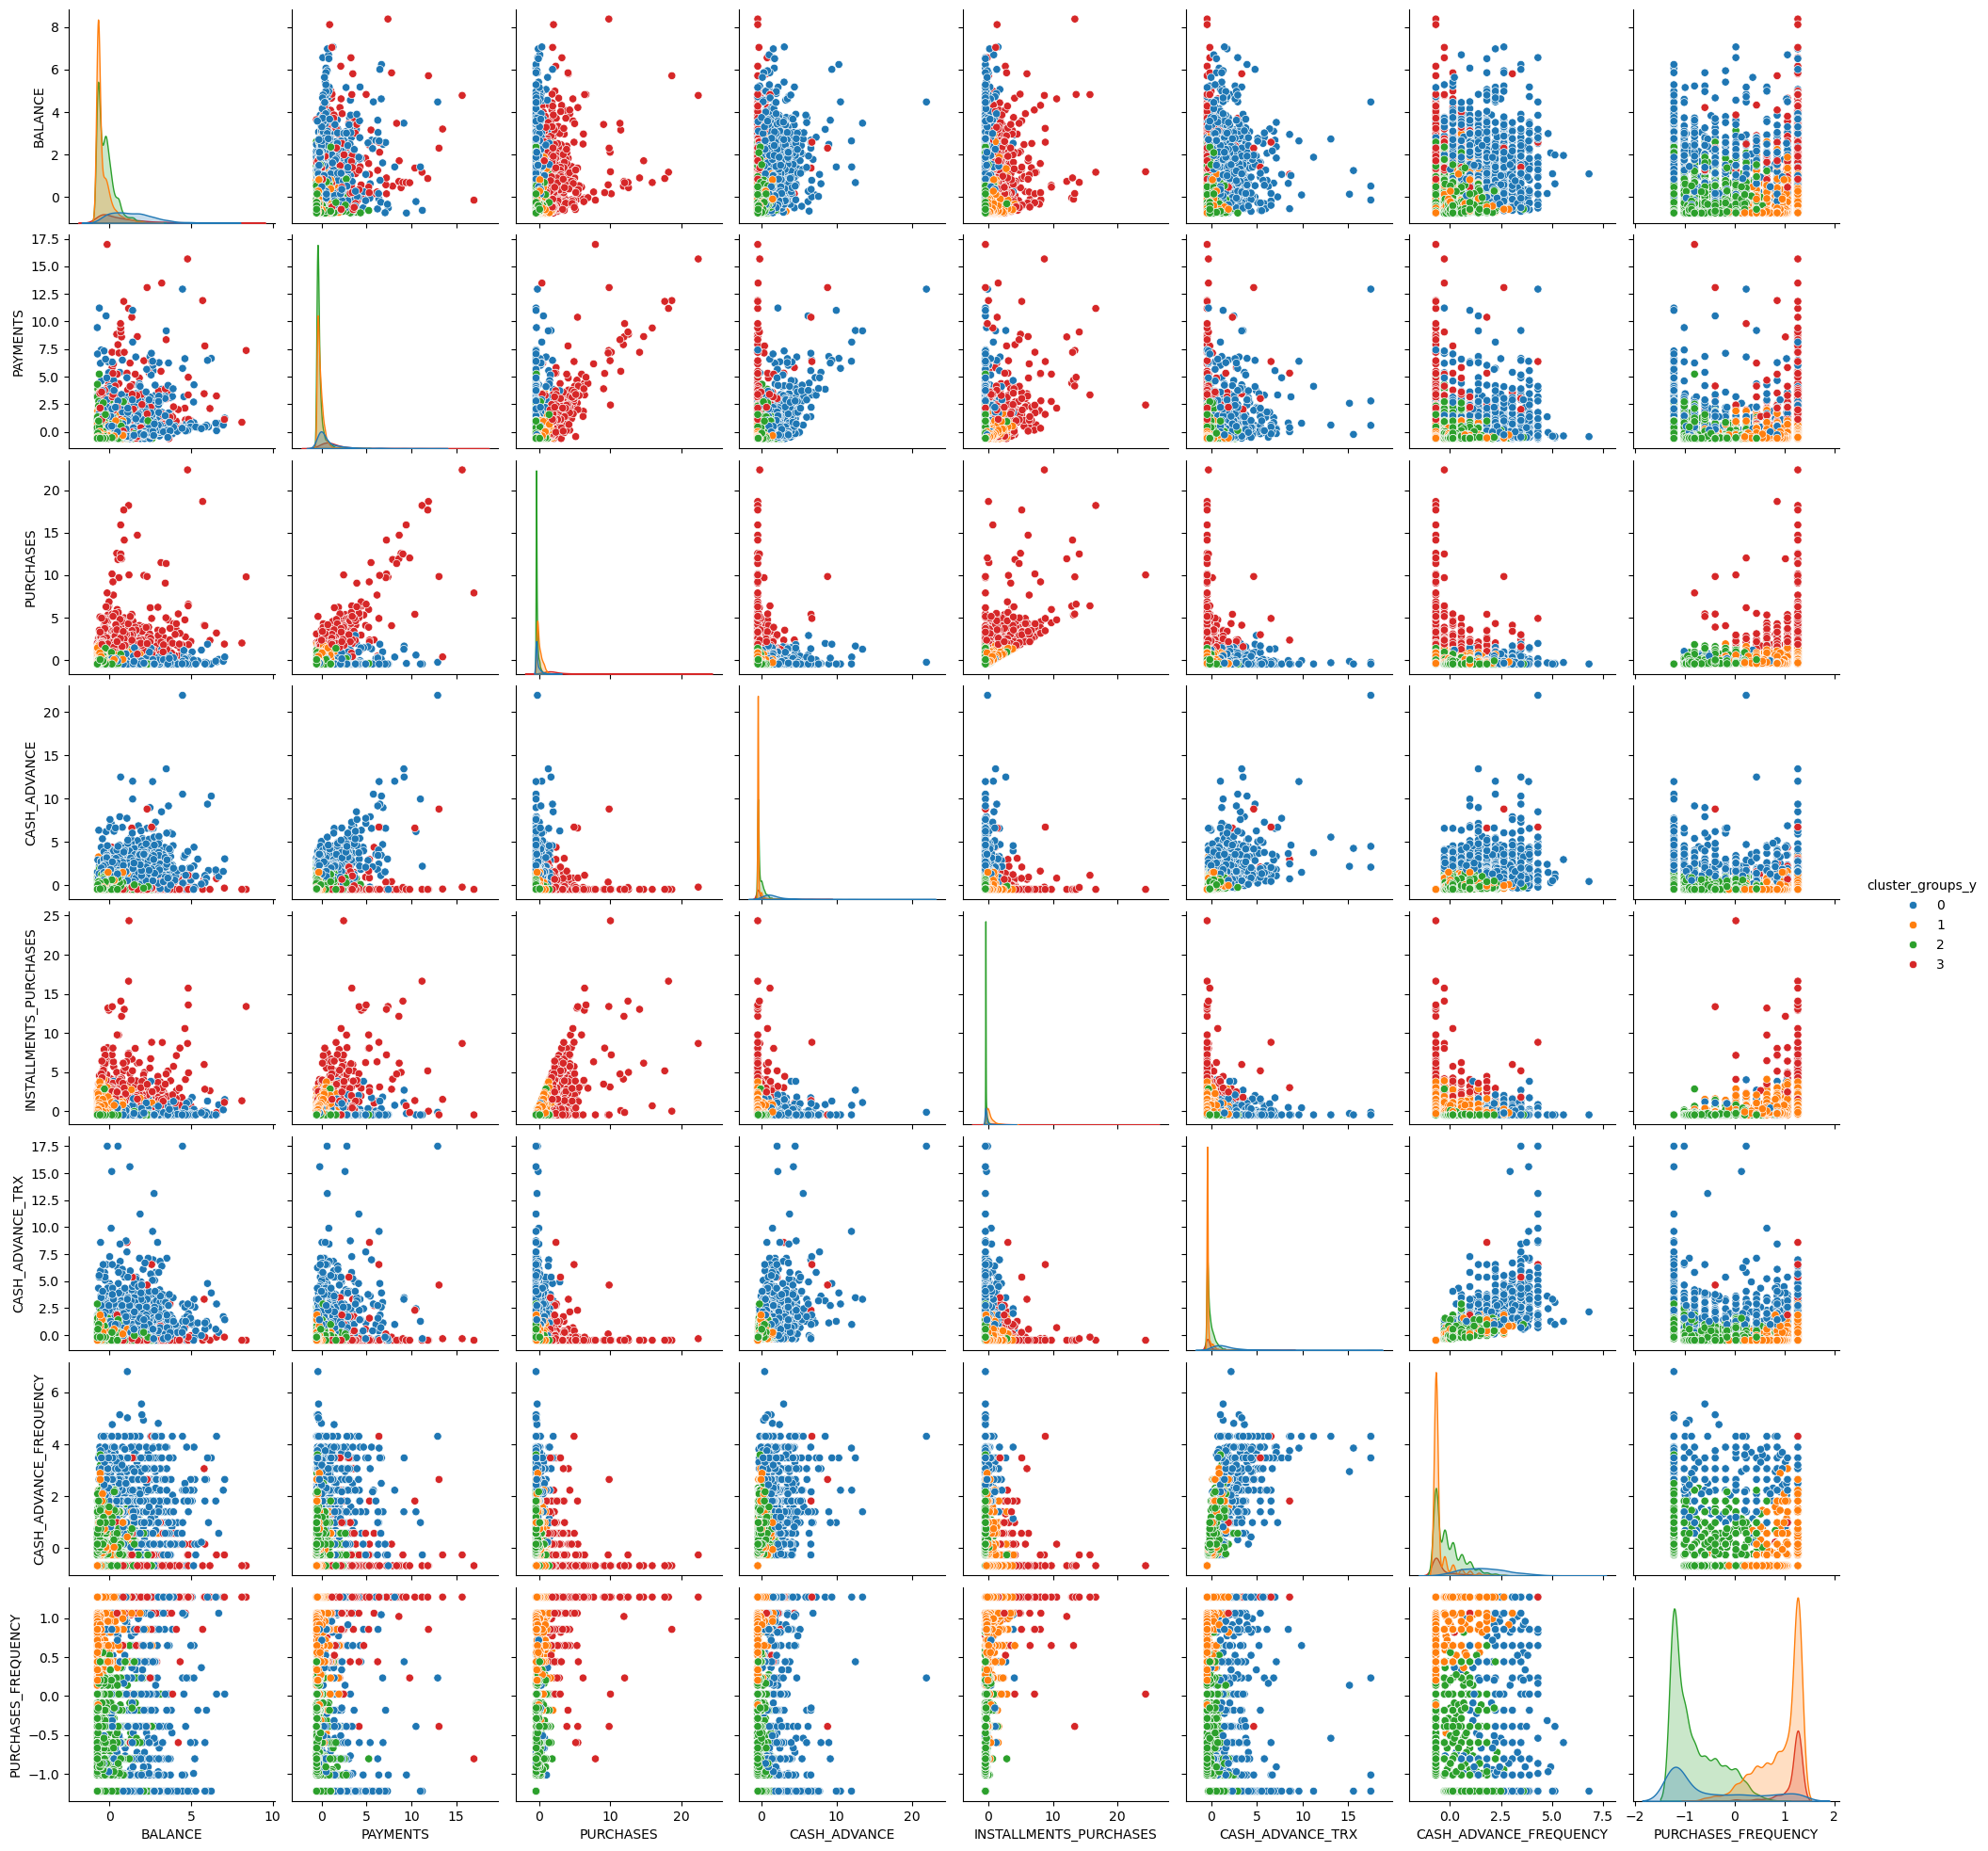

In [ ]:
num_clusters = 4

# Applying K-Means
kmeans_pca = KMeans(n_clusters=num_clusters, **params)

df_pca_comp = df_pca[pca_cols]

# Assigning Cluster groups
df_pca_comp['cluster_groups'] = kmeans_pca.fit_predict(df_pca_comp)

display(df_pca_comp['cluster_groups'].value_counts())

# INNER JOIN Dataframes to get additional Feautures, to group via cluster_groups
df_clean_pca = df_clean_std.merge(df_pca_comp['cluster_groups'], how='inner', left_index=True, right_index=True)

feat_to_explore = ['BALANCE','PAYMENTS','PURCHASES','CASH_ADVANCE','INSTALLMENTS_PURCHASES','CASH_ADVANCE_TRX','CASH_ADVANCE_FREQUENCY','PURCHASES_FREQUENCY','cluster_groups_y']

display(df_clean_pca)

# Visualize the clusters pair plots
plt.figure(figsize=(15, 10))
sns.pairplot(df_clean_pca[feat_to_explore], hue='cluster_groups_y', palette = "tab10")

plt.grid(True)
mng = plt.get_current_fig_manager()
mng.full_screen_toggle()
plt.grid(True)
plt.show()

### Observation
- We have 4 customer groups, with Group 2 being the largest followed by Group 1, Group 0, Group 3.

#### **Group 3 (Red):** 
- Tend to have a broad distribution of **balance** and large number who participate in **installment_purchases** with their card. They tend to make high amount of **purchases** with their card and have a high **Purchases_Frequency**, with high amounts of **Payments**. They also use their card for cash withdrawals, as shown via **Cash_Advance_Trx** & **Cash_Advance_Frequency**, but not as active as Group 3 on this case. 
- This entails Group 2 use the card to make multiple large amount of purchases and quite frequently, hence they are the active for large purchases. 
- **(*active frequent-large-spenders*)**

#### **Group 1 (Orange):** 
- Tend to have a low **balance** within their card, and only a small number participate in **installment_purchases** with their card. They tend to make very low amount of **purchases** with their card but have a high **Purchases_Frequency**, but make small amounts of **Payments**. They do not use their card for any cash withdrawals, as shown via **Cash_Advance_Trx** & **Cash_Advance_Frequency**. 
- This entails Group 0 use the card to make multiple small amount purchases quite frequently, hence utilising the card for small everyday purchases. 
- **(*active everyday-small-spending*)**

#### **Group 0 (Blue):** 
- Tend to have a high **balance** within their card, and make no **installment_purchases** with their card. They tend to make very low amount of **purchases** with their card, but make some **Payments** in correlation to **Cash_Advance**. This indicates Group 3 tend to make large number of cash withdraws, as shown in **Cash_Advance_Trx** & **Cash_Advance_Frequency**. 
- This entails Group 3 only use their card mainly to withdraw cash only and make no purchases with the card as shown with the low **Purchases_Frequency**, hence utilising the card for short term cash loans. 
- **(*active short-term-cash-loans-borrowers*)**

#### **Group 2 (Green):** 
- Tend to have a low **balance** within their card, and make no **installment_purchases** with their card. They tend to make very low amount of **purchases** with their card, toether with low **Purchases_Frequency**. Also, low amount of **Payments** along with low activity of cash withdrawals as shown via **Cash_Advance_Trx** & **Cash_Advance_Frequency**. 
- This entails Group 1 have no activity in using their card, which can signify they have limited funds and unable to spend. Hence, they are the 
- **(*non-spenders*)**  

### **Conclude:**
- A credit card compnay can us this customer segmentation to tailor products and marketing strategy. Group 2 (Green) are not your spenders because they are unable to, Group 0 (Blue) do not spend, but they will withdraw cash for short-term loan purposes. Group 1 (Orange) have a low balance, do not make big purchases, nor do they participate in installment purchases, but will use the card for everyday small purchases, Group 3 (Red) are the big spenders, who make regular high purchases.
- These characteristics are ideal for a credit card company to innovate new ideas, such as incentives for each group, related to their common activity, i.e., low Fee cash withdrawals when used x amount of times, rewards for daily low-purchase use or card, and big rewards for big purchases, or to offer alternative credit cards based on their limitations ...etc; using incentives to get these groups to spend or utilise their card more.



---
# 4 Business Insights & Recommendations on Customer Segments ( incl. Kmeans to Kmeans_PCA cross-over)

### KMeans-to-KMans_PCA comparisons

- The table below shows the cross over of customer segments between the two clustering methods 'Kmeans' and 'Kmeans with PCA' using the same dataset that has been transformed and Standarised.

|   **KMeans**      |    **KMeans_PCA**     | **Group Descriptor** |
|---------------------|------------------------|------------------------|
|**Group 0 (Purple)**  |	**Group 0 (Blue)** |     *active short-term-cash-loans-borrowers* |
| **Group 1 (Turquoise)**	| **Group 1 (Orange)** | *active everyday-small-spending* |
| **Group 2 (Yellow)**	| **Group 3 (Red)** | *active frequent-large-spenders* |
| 	| **Group 2 (Green)** | *non-spenders* (unable to spend)|

- After performing PCA on the same dataset, and using 6 PCA components leading to a 80%+ **Cumulative Explained Variance**, and performing KMeans clustering just on the PCA components, led to similar results to the to that of the KMeans clustering *without* PCA. However, the results from the KMeans clustering with PCA gave us an extra cluster (additional customer segment), showing those who are unable to spend/the non-spenders, which entails PCA methods in dimensionality reduction leads to granular insights.

### **Business Insights:**
- There exists 3-4 customer segments, in which a credit card company can tailor products and marketing strategies based on each one, in order to utilise their credit card more custom to their characteristics. The customer segments are;

    - **active frequent-large-spenders**
        - The big spenders, high-balance in their card, those who purchasing quite frequently, making high purchases, and participate in purchase installements using their card.

    - **active everyday-small-spending**
        - The everyday small spenders, low-balance in their card, those who purchasing quite frequently, making small purchases only with their card, and do not participate in purchase installemts using their card.

    - **active short-term-cash-loans-borrowers**
        - Those who frequently make cash withdrawals and cash transactions, high-balance in their card, but do not make any purchases, nor do they participate in purchase installments. Hence, using their card for short-term cash loans

    - **non-spenders** (Additional segments from KMeans PCA)
        - Those who show no ativity in using their card, low-balance in their card, low purchases together with low purchase frequency, and no cash withdrawals as seen in the low Cash advencement features. Hence, they are the 'non-spenders', which may be due to having a low-baance and are unable to spend. 

### **Recommendations on Customer Segments:**
- A credit card compnay can us this customer segmentation to tailor products and marketing strategies.

- These characteristics are ideal for a credit card company to innovate new ideas, such as **incentives** for each group, related to their common activity such as;

    - **active frequent-large-spenders**
        - Big Rewards for big purchases, and discount on credit card fees when card is used for big purchases and frequent purchases.

    - **active everyday-small-spending**
        - Everyday Rewards for everyday small purchases, which can relate to discount on travel-to-work, shopping..etc.

    - **active short-term-cash-loans-borrowers**
        - Low Fee cash withdrawals & transactions, when cash is withdrawn 'x' amount of times for a certain period, or provide advice to boost their credit rating when using their card.

    - **non-spenders** (Additional segments from KMeans PCA)
        - Potential Rewards catered to their limitations, and on what type of purchases they can utilise their card to help reap more benefits, and to boost their credit rating. Hence, motivation to use their card more. 

- Overall, the goal is to get customers to use their card more based on their characteristics. With incentives which includes rewards, advice to their credit rating, can potentially motivate these customer segments to to get these groups to utilise their card more. 



---
# 5. Alternative Clustering Methods and Insights (Optional)

- We want to use a clustering model where we specify the number of clusters/segments within the model, with medium scalability since we are using a small dataset, using a different geometry of determining clusters compared to KMeans.#
- In this case below, we are going to use Spectral Clustering with the PCA components

|   **Method name**      |    **Parameters**     | **Scalability** | **Usecase** | **Geometry (metric used)** |
|------------------------|-----------------------|------------------|------------|----------------------------|
|**KMeans**              |	number of clusters   |    Very large n_samples, medium n_clusters with MiniBatch code | General-purpose, even cluster size, flat geometry, not too many clusters, inductive | Distances between points |
| **Spectral clustering**|	number of clusters   |    Medium n_samples, small n_clusters | Few clusters, even cluster size, non-flat geometry, transductive | Graph distance (e.g. nearest-neighbor graph) |



pc1       pc2       pc3       pc4       pc5       pc6
0    -1.804034 -0.990181 -0.665655  0.393696 -0.357405 -0.589924
1    -0.922393  2.638112 -0.370624 -0.430699 -0.838052  1.183856
2     0.744675 -0.572953 -0.892978  0.575776  2.540672  0.856228
3    -0.881134  0.113675 -1.438228  0.697204  0.064552  0.309735
4    -1.798847 -0.701786 -0.922804  0.539288 -0.205961 -0.430316
...        ...       ...       ...       ...       ...       ...
8871 -0.887366 -0.850857 -1.298174  0.366640  0.538042 -0.160790
8872 -0.288717 -2.162814  1.209360 -0.824801 -0.519818  0.197173
8873 -0.751446 -1.835897  0.820729 -0.333670 -0.240370 -0.189176
8874 -2.072259 -0.577917 -0.788783 -0.293091 -0.587239 -0.468564
8875 -0.223341 -0.364769 -0.784973 -0.351189  1.621576 -1.173324

[8876 rows x 6 columns]

0.30040491832952027
0.22965229939432116
0.061000943979465316
0.11113876428579003
0.14225943234607438
0.0993951858091628
0.0646355887791375
0.06555076151084097
0.04379632056268192


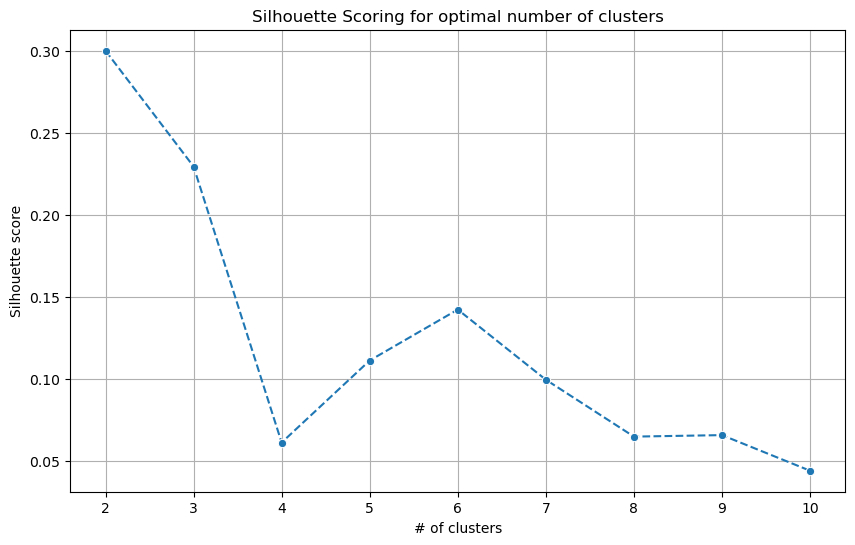

In [49]:
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score

# Define our df_pca with just pca components for spectral clustering
df_pca_comp_sc = df_pca_comp[pca_cols]
display(df_pca_comp_sc)

# define standard parmeters for spectral clustering
params_sc = {
    "eigen_solver": "arpack" ,
    "n_components" : len(pca_cols),
    "n_init": 10, 
    "random_state": 42,
    "affinity" :'nearest_neighbors'
    }

sil_scores_sc = []
max_clusters = 10

# Range from 2+ clusters to 10
for i in range(2, max_clusters + 1):
    spec_clust = SpectralClustering(n_clusters=i, **params_sc)
    spec_clust.fit(df_pca_comp_sc)
    labels_sc = spec_clust.fit_predict(df_pca_comp_sc) 
    print(silhouette_score(df_pca_comp_sc , spec_clust.labels_))
    sil_scores_sc.append(silhouette_score(df_pca_comp_sc , spec_clust.labels_))

# # silhouette Scores
plt.figure(figsize=(10, 6))
sns.lineplot(x=range(2, max_clusters + 1), y=sil_scores_sc, marker='o', linestyle='--')
plt.xlabel('# of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette Scoring for optimal number of clusters')
plt.grid(True)
plt.show()


### Observation
- We see we get a sharp drop off after 3 clusters, hence we will choose 3 for our SpectralClustering model.

cluster_groups
2    4369
0    3132
1    1375
Name: count, dtype: int64

BALANCE  PAYMENTS  MINIMUM_PAYMENTS  PURCHASES  INSTALLMENTS_PURCHASES  \
0    -0.736905 -0.531938         -0.299201  -0.426040               -0.349910   
1     0.779306  0.820499          0.098709  -0.470533               -0.455019   
2     0.440093 -0.386245         -0.091135  -0.109937               -0.455019   
3     0.042775 -0.601897         -0.358710   0.228579               -0.455019   
4    -0.364364 -0.366739         -0.254292  -0.463071               -0.455019   
...        ...       ...               ...        ...                     ...   
8871 -0.663687 -0.601897         -0.358710   0.001790               -0.455019   
8872 -0.742855 -0.489023         -0.337857  -0.334759               -0.134270   
8873 -0.745298 -0.573723         -0.323554  -0.403187               -0.295923   
8874 -0.750066 -0.583679         -0.334927  -0.470533               -0.455019   
8875 -0.577778 -0.579999         -0.321049   0.039343               -0.455019   

      CASH_ADVANCE  ONE_OFF_PURCHASES  CREDIT_LIMIT  PURCHASES_TRX  \
0        -0.468992          -0.357926     -0.961640      -0.512413   
1         2.593303          -0.357926      0.684124      -0.592596   
2        -0.468992           0.106237      0.821271      -0.111498   
3        -0.371182           0.541981      0.821271      -0.552505   
4        -0.468992          -0.348321     -0.906781      -0.552505   
...            ...                ...           ...            ...   
8871     -0.468992           0.250055     -0.138758      -0.512413   
8872     -0.468992          -0.357926     -0.961640      -0.352047   
8873     -0.468992          -0.357926     -0.961640      -0.392139   
8874     -0.451616          -0.357926     -1.098787      -0.592596   
8875     -0.408611           0.298394     -0.906781       0.329508   

      CASH_ADVANCE_TRX  CASH_ADVANCE_FREQUENCY  PURCHASES_FREQUENCY  \
0            -0.478306               -0.678664            -0.806206   
1             0.105923                0.567547            -1.221417   
2            -0.478306               -0.678664             1.269844   
3            -0.332249               -0.263262            -1.013812   
4            -0.478306               -0.678664            -1.013812   
...                ...                     ...                  ...   
8871         -0.478306               -0.678664            -0.390997   
8872         -0.478306               -0.678664             1.269844   
8873         -0.478306               -0.678664             0.854633   
8874         -0.186192                0.152145            -1.221417   
8875         -0.186192                0.982948             0.439425   

      ONE_OFF_PURCHASES_FREQUENCY  PRC_FULL_PAYMENT  \
0                       -0.681576         -0.528346   
1                       -0.681576          0.229157   
2                        2.662996         -0.528346   
3                       -0.402863         -0.528346   
4                       -0.402863         -0.528346   
...                           ...               ...   
8871                     0.433280         -0.528346   
8872                    -0.681576          1.176038   
8873                    -0.681576          0.323846   
8874                    -0.681576          0.323846   
8875                     1.548140         -0.528346   

      PURCHASES_INSTALLMENTS_FREQUENCY  cluster_groups_x  cluster_groups_y  
0                            -0.705852                 0                 2  
1                            -0.915619                 1                 0  
2                            -0.915619                 0                 1  
3                            -0.915619                 0                 2  
4                            -0.915619                 0                 2  
...                                ...               ...               ...  
8871                         -0.915619                 0                 2  
8872                          1.182052                 0       

<Figure size 1500x1000 with 0 Axes>

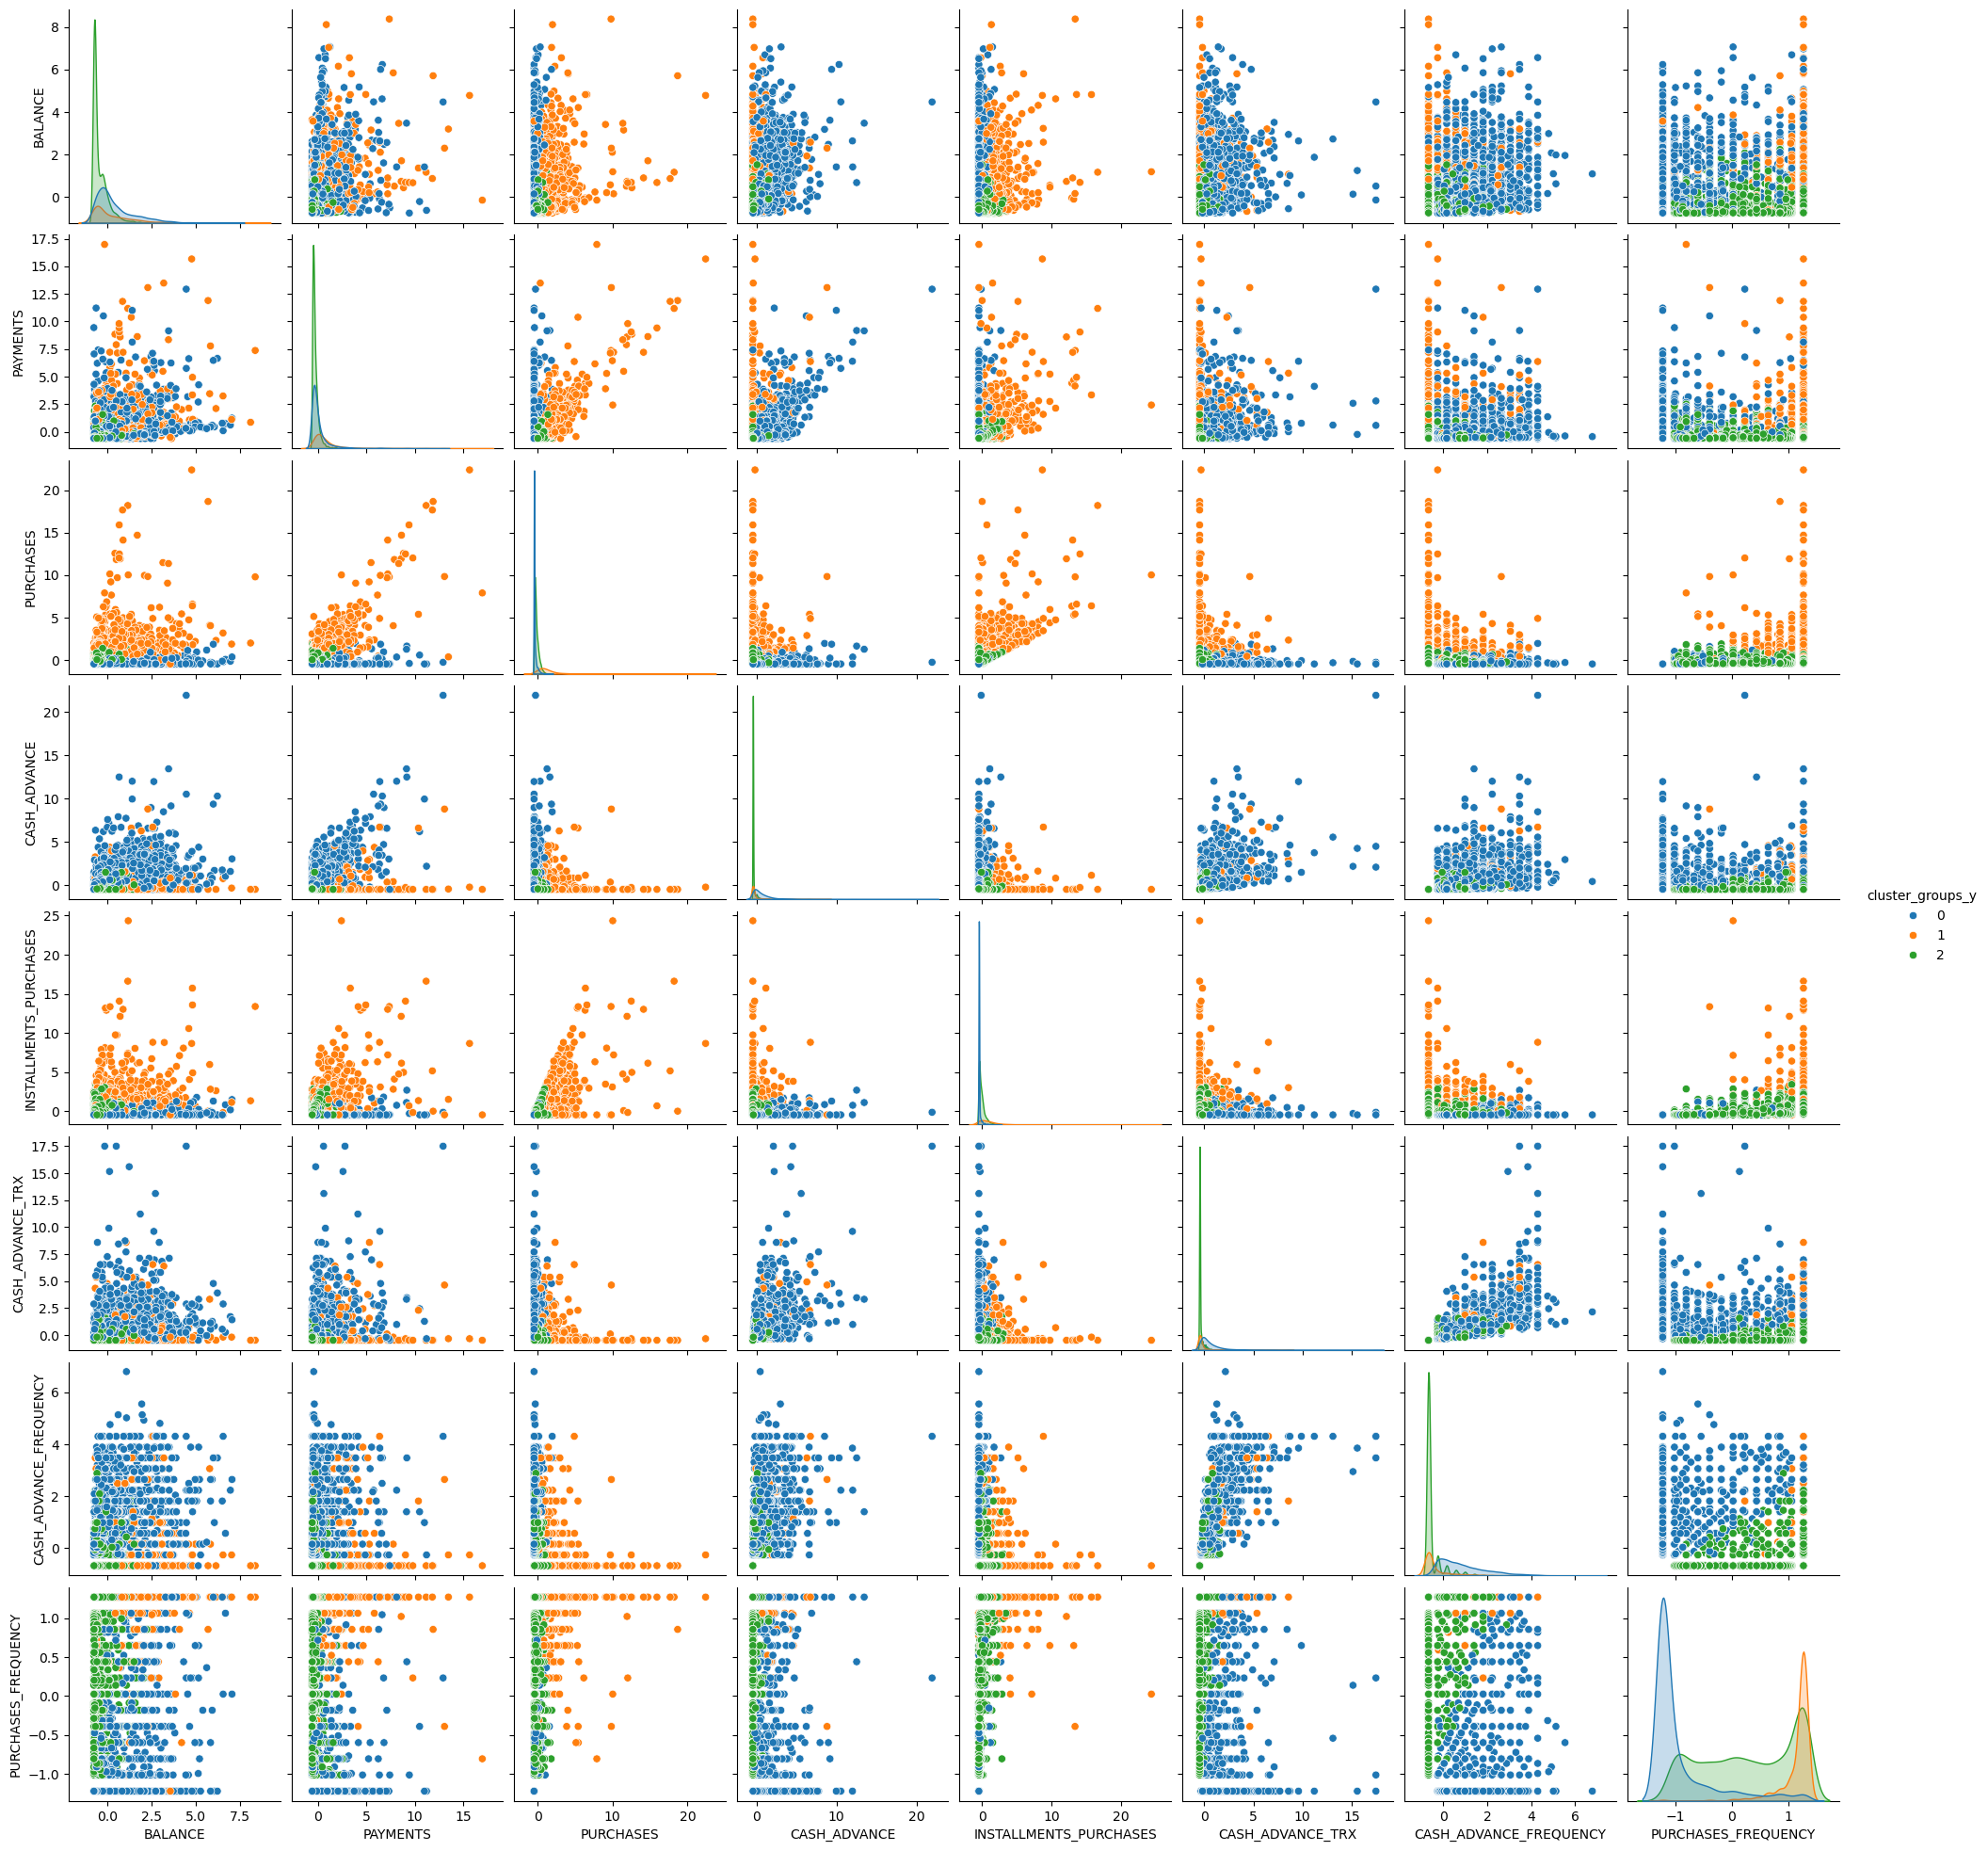

In [ ]:
num_of_sc_clusters = 3

# Applying Spectral Clustering
spec_clust = SpectralClustering(n_clusters=num_of_sc_clusters, **params_sc)

# Assigning Cluster groups
df_pca_comp_sc['cluster_groups'] = spec_clust.fit_predict(df_pca_comp_sc)

display(df_pca_comp_sc['cluster_groups'].value_counts())

# INNER JOIN Dataframes to get additional Feautures, to group via cluster_groups
df_clean_pca_sc = df_clean_std.merge(df_pca_comp_sc['cluster_groups'], how='inner', left_index=True, right_index=True)

feat_to_explore = ['BALANCE','PAYMENTS','PURCHASES','CASH_ADVANCE','INSTALLMENTS_PURCHASES','CASH_ADVANCE_TRX','CASH_ADVANCE_FREQUENCY','PURCHASES_FREQUENCY','cluster_groups_y']

display(df_clean_pca_sc)

# Visualize the clusters pair plots
plt.figure(figsize=(15, 10))
sns.pairplot(df_clean_pca_sc[feat_to_explore], hue='cluster_groups_y', palette = "tab10")

plt.grid(True)
mng = plt.get_current_fig_manager()
mng.full_screen_toggle()
plt.grid(True)
plt.show()

In [63]:
df_clean_sc = df_clean.merge(df_pca_comp_sc['cluster_groups'], how='inner', left_index=True, right_index=True)

feat_to_explore_sc = ['BALANCE','PAYMENTS','PURCHASES','CASH_ADVANCE','INSTALLMENTS_PURCHASES','CASH_ADVANCE_TRX','CASH_ADVANCE_FREQUENCY','PURCHASES_FREQUENCY','cluster_groups']
df_clean_sc[feat_to_explore_sc].groupby('cluster_groups').agg(['mean', 'median' , 'max'])

BALANCE                               PAYMENTS  \
                       mean       median          max         mean   
cluster_groups                                                       
0               1573.626147   864.975705  18495.55855  1723.103852   
1               1833.325882  1029.221287  16115.59640  1973.515088   
2               1520.137035   883.372520  19043.13856  1694.163839   

                                            PURCHASES                     \
                     median          max         mean   median       max   
cluster_groups                                                             
0                831.048408  50721.48336   996.351320  358.200  49039.57   
1               1013.055560  28896.66522  1223.378202  397.250  35131.16   
2                862.642469  40627.59524   960.841536  367.695  41050.40   

               CASH_ADVANCE                     INSTALLMENTS_PURCHASES  \
                       mean median          max                   mean   
cluster_groups                                                           
0                976.919276    0.0  29282.10915             400.997420   
1               1033.618865    0.0  26194.04954             482.522376   
2                988.321188    0.0  47137.21176             402.959557   

                                 CASH_ADVANCE_TRX              \
                median       max             mean median  max   
cluster_groups                                                  
0               89.800  15497.19         3.221578    0.0   80   
1               71.125  12541.00         3.388158    0.0  123   
2               90.000  22500.00         3.301386    0.0  123   

               CASH_ADVANCE_FREQUENCY                  PURCHASES_FREQUENCY  \
                                 mean median       max                mean   
cluster_groups                                                               
0                            0.133913    0.0  1.250000            0.489880   
1                            0.134256    0.0  1.166667            0.490627   
2                            0.138761    0.0  1.500000            0.488114   

                            
               median  max  
cluster_groups              
0                 0.5  1.0  
1                 0.5  1.0  
2                 0.5  1.0

### Observation
- We see that the SpectralCluster algorithm with PCA produced similar results (e.g., same customer segments) as the KMeans without the PCA components; hence the cross over is such;

### KMeans, KMans_PCA, SpectralCluster_PCA comparisons


|   **KMeans**      |    **KMeans_PCA**     | **SpectralCluster_PCA** | **Group Descriptor** |
|---------------------|------------------------|------------------------|------------------------|
|**Group 0 (Purple)**  |	**Group 0 (Blue)** |   **Group 0 (Blue)**  |*active short-term-cash-loans-borrowers* |
| **Group 1 (Turquoise)**	| **Group 1 (Orange)** | **Group 2 (Green)** |*active everyday-small-spending* |
| **Group 2 (Yellow)**	| **Group 3 (Red)** |  **Group 1 (Orange)** |*active frequent-large-spenders* |
| 	| **Group 2 (Green)** | |*non-spenders* (unable to spend)|

- From the Statistical table aggregating on customer segments, we can see by looking at the MEAN values per feature, cluster_group = 1 achieves the highest, becoming quite distinctive compared to the other segments as the *large spenders*.

